# Business Understanding

<img src='image/Waterpoint.jpeg' alt='Waterpoint Operational Status Prediction Project.jpeg' width='400' height='150'>
Generated by Copilot

## 1. **Objective**
The primary goal of this project is to predict the operational status of waterpoints in Tanzania. By accurately predicting whether a waterpoint is functional, needs repair, or is non-functional, it can help the Tanzanian Ministry of Water and other stakeholders optimize maintenance operations and ensure a reliable supply of clean water to communities.

## 2. **Stakeholders**
- **Tanzanian Ministry of Water**: Responsible for the maintenance and management of waterpoints.
- **Local Communities**: Depend on these waterpoints for their daily water needs.
- **Maintenance Teams**: Tasked with repairing and maintaining the waterpoints.
- **Non-Governmental Organizations (NGOs)**: Often involved in funding and supporting water infrastructure projects.
- **Data Scientists and Analysts**: Working on the project to develop predictive models.

## 3. **Success Criteria**
- **Accuracy**: The model should have a high accuracy in predicting the status of waterpoints.
- **Actionable Insights**: The predictions should lead to actionable insights that can improve maintenance schedules and resource allocation.
- **Scalability**: The solution should be scalable to handle data from other regions or countries.

## 4. **Key Questions**
- **Which factors most influence the operational status of waterpoints?**
- **How can we prioritize waterpoints for maintenance based on the model's predictions?**
- **What patterns or trends can be identified from the data that could inform future waterpoint installations?**

## 5. **Constraints**
- **Data Quality**: The accuracy of the model depends on the quality and completeness of the data.
- **Resource Limitations**: Limited resources for maintenance and repairs may affect the implementation of the model's recommendations.
- **Geographical Challenges**: Remote or hard-to-reach areas may pose challenges for data collection and maintenance.

## 6. **Potential Impact**
- **Improved Water Access**: Ensuring that more waterpoints are functional can significantly improve access to clean water for communities.
- **Cost Savings**: Predictive maintenance can reduce costs by preventing major breakdowns and optimizing resource allocation.
- **Enhanced Decision-Making**: Data-driven insights can help policymakers and stakeholders make informed decisions about water infrastructure investments.

# 2. Data Understanding

In [1]:
# Import necessary libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for preprocessing and model building
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

# Import category encoders
import category_encoders as ce
from category_encoders import WOEEncoder, TargetEncoder

Explanation:
- pandas and numpy: For data manipulation
- matplotlib and seaborn: For data visualization
- sklearn libraries: For data preprocessing, model building, and evaluation
- category_encoders: For encoding categorical variables

## 2.1). Load the Data

In [2]:
# Independent variables (features)
train_values = pd.read_csv('data/training_set_values.csv', index_col='id')

# Dependent variable
train_labels = pd.read_csv('data/training_set_labels.csv', index_col='id')

# Test Data
test_data = pd.read_csv('data/test_set_values.csv', index_col='id')

The code reads three CSV files into separate DataFrames: `train_values` for the training features, `train_labels` for the training labels, and `test_data` for the test features. Each DataFrame uses the 'id' column as its index, preparing the data for further analysis or model training.

## 2.2). Basic Data Inspection

Check the first few rows to get a general idea of the data.

In [3]:
# Display the first few rows of the dataset
train_values.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
train_labels.head()

,status_group
id,
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional


In [5]:
test_data.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [6]:
# Merge the independent and dependent variables 
train_data = pd.merge(train_labels, train_values, how='inner', left_index=True, right_index=True)

# setting a new index
train_data = train_data.reset_index()
#train_data = train_data.reset_index(drop=True)

- Get the shape of the dataset to know the number of rows and columns.

In [7]:
# Check the shape of the dataset
train_data.shape

(59400, 41)

- View the column names to understand the features available.

In [8]:
# View the columns
train_data.columns

Index(['id', 'status_group', 'amount_tsh', 'date_recorded', 'funder',
       'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name',
       'num_private', 'basin', 'subvillage', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'recorded_by', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

- Check for any missing values in the dataset.

In [9]:
# Check for missing values
missing_values = train_data.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

funder                3637
installer             3655
wpt_name                 2
subvillage             371
public_meeting        3334
scheme_management     3878
scheme_name          28810
permit                3056
dtype: int64


The columns with missing data, such as `funder`, `installer`, `public_meeting`, and `scheme_name`, is crucial for data cleaning and preprocessing steps to ensure the quality and completeness of the dataset before analysis or model training.

- Examine the unique values in categorical columns to understand the diversity of the data.

In [10]:
# Get categorical columns
categorical_columns = train_data.select_dtypes(include=['object', 'int', 'float']).columns

# Create dictionary with column names and unique values
unique_values_dict = {col: train_data[col].nunique() for col in categorical_columns}

# Convert dictionary to DataFrame
unique_values_df = pd.DataFrame(list(unique_values_dict.items()), columns=['Column', 'Unique Values'])

# Limit to 5 rows
unique_values_df = unique_values_df

print(unique_values_df)

                   Column  Unique Values
0                      id          59400
1            status_group              3
2              amount_tsh             98
3           date_recorded            356
4                  funder           1896
5              gps_height           2428
6               installer           2145
7               longitude          57516
8                latitude          57517
9                wpt_name          37399
10            num_private             65
11                  basin              9
12             subvillage          19287
13                 region             21
14            region_code             27
15          district_code             20
16                    lga            125
17                   ward           2092
18             population           1049
19         public_meeting              2
20            recorded_by              1
21      scheme_management             11
22            scheme_name           2695
23              

**Insights**:
  
1. **High Cardinality Columns**:
   - **id**: 59,400 unique values. This is likely a unique identifier for each record.
   - **longitude** and **latitude**: Both have over 57,000 unique values, indicating a wide geographical spread of data points.
   - **wpt_name**: 37,399 unique values, suggesting a large number of unique water point names.
   - **subvillage**: 19,287 unique values, indicating a high number of unique sub-villages.

2. **Moderate Cardinality Columns**:
   - **funder**: 1,896 unique values. This shows a diverse range of funding sources.
   - **installer**: 2,145 unique values, indicating many different installers.
   - **gps_height**: 2,428 unique values, suggesting varied elevation data.
   - **ward**: 2,092 unique values, reflecting a large number of administrative wards.
   - **scheme_name**: 2,695 unique values, indicating many different water schemes.

3. **Low Cardinality Columns**:
   - **status_group**: 3 unique values, likely representing different statuses (e.g., functional, non-functional).
   - **public_meeting** and **permit**: Both have 2 unique values, indicating binary data (e.g., Yes/No).
   - **recorded_by**: Only 1 unique value, suggesting all data was recorded by the same entity.
   - **management_group**: 5 unique values, indicating a few management categories.

4. **Columns with Specific Insights**:
   - **date_recorded**: 356 unique values, suggesting data was recorded over almost a year.
   - **amount_tsh**: 98 unique values, indicating a range of amounts in Tanzanian Shillings.
   - **population**: 1,049 unique values, reflecting varied population sizes at different locations.
   - **construction_year**: 55 unique values, indicating water points were constructed over several years.

5. **Categorical Columns with Few Unique Values**:
   - **basin**, **region**, **region_code**, **district_code**, **lga**, **scheme_management**, **extraction_type**, **extraction_type_group**, **extraction_type_class**, **management**, **payment**, **payment_type**, **water_quality**, **quality_group**, **quantity**, **quantity_group**, **source**, **source_type**, **source_class**, **waterpoint_type**, **waterpoint_type_group**: These columns have relatively few unique values, indicating they are categorical with limited distinct categories.

## 2.3). Data Types and Summary Statistics

- Get the data types of each column.

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55763 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59398 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

It contains 59,400 entries and 41 columns. Each column's name, non-null count, and data type are listed, indicating the presence of various data types such as integers, floats, and objects (strings).

- Generate summary statistics for numerical columns.

In [12]:
# Summary statistics for numerical features
train_data.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


The output provides a statistical summary of the dataset:

1. **Amount of Tanzanian Shilling (amount_tsh)**: The mean amount of shilling available is approximately TSH 318, but the high standard deviation (2997.57) and the maximum value (TSH 350,000) indicate significant variability, suggesting some water point have extremely high budget availability.

2. **GPS Height**: The average GPS height is around 668 meters, with a standard deviation of 693 meters. The minimum value is -90 meters, which might indicate erroneous data or below sea level measurements.

3. **Longitude and Latitude**: The mean longitude is 34.08, and the mean latitude is -5.71, which are consistent with the geographical location of Tanzania. The standard deviations and ranges indicate a wide geographical spread of the data points.

4. **Population**: The average population served by a water point is around 180 people, but the high standard deviation (471.48) and the maximum value (30,500) suggest that some water points serve very large populations.

5. **Construction Year**: The mean construction year is skewed by the presence of many zero values (indicating missing or unknown data). The median construction year is 1986, with most water points constructed between 2004 and 2013.

- Generate summary statistics for categorical columns.

In [13]:
# Summary statistics for categorical features
train_data.describe(include=['object'])

,status_group,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,59400,59400,55763,55745,59398,59400,59029,59400,59400,59400,...,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,3,356,1896,2145,37399,9,19287,21,125,2092,...,7,8,6,5,5,10,7,3,7,6
top,functional,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,...,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,32259,572,9084,17402,3563,10248,508,5294,2503,307,...,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625


The dataset summary reveals several key insights:

1. **Status Group**: The most frequent status group is "functional," with 32,259 entries, indicating that a majority of the water points are operational.
2. **Date Recorded**: The data spans 356 unique recording dates, with the most common date being March 15, 2011.
3. **Funder and Installer**: The Government of Tanzania and DWE are the most common funder and installer, respectively, highlighting their significant role in water point projects.
4. **Geographical Distribution**: The data covers various regions, with Iringa being the most represented region. The most common basin is Lake Victoria.
5. **Water Quality and Source**: The majority of water points have "soft" water quality and are sourced from springs, indicating a prevalence of groundwater sources.
6. **Waterpoint Type**: The most common waterpoint type is "communal standpipe," suggesting a focus on shared water access points.

- Analyse the target column `status_group`

In [14]:
train_data['status_group'].value_counts()

status_group
functional                 32259
non functional             22824
functional needs repair     4317
Name: count, dtype: int64

We have highly imbalanced target values. Also, there are some null values and some columns which contain same information in the data set. Now, we will drop them because the same values or dublicated values do not affect our target, and when we simplify our data we can run our models easier.

# 3. Data Exploration
## 3.1). Univariate Analysis
- Analyze the distribution of numerical features.

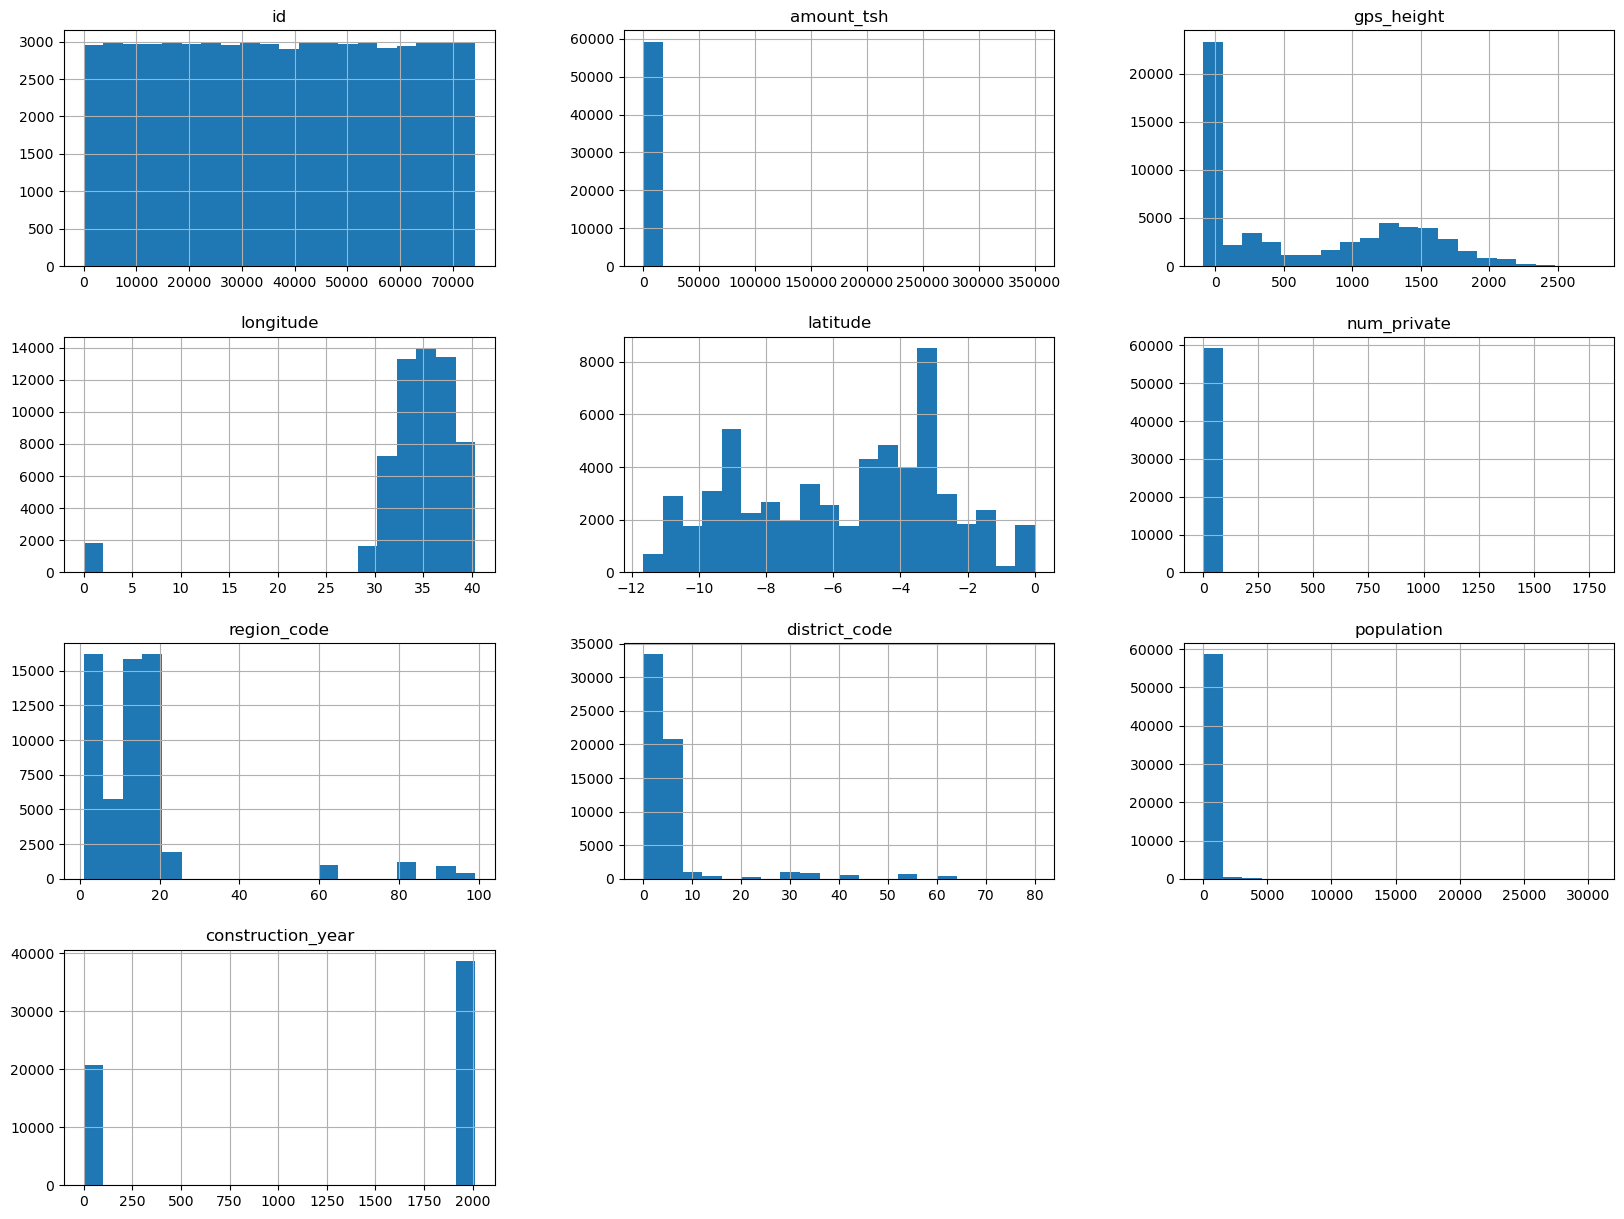

In [15]:
# Distribution of numerical features
train_data.hist(bins=20, figsize=(20, 15))
plt.show()

Analysis of the univariate numerical columns:

1. **ID**: Most IDs are clustered at the higher end, indicating a large number of entries with high ID values.
2. **Amount TSH**: The majority of values are near zero, suggesting that most entries have low or no values for this variable.
3. **GPS Height**: This shows a normal distribution centered around zero, indicating that the heights are evenly distributed around sea level.
4. **Longitude**: The data points are spread out with noticeable gaps, meaning some longitude ranges have no data.
5. **Latitude**: There are two distinct peaks, suggesting two common latitude ranges where most data points fall.
6. **Num Private**: Almost all values are at or near zero, indicating that this variable is predominantly low or zero.
7. **Region Code**: The majority of data points are concentrated in the lower region code values, showing a steep decline as the region code increases. This suggests that most entries belong to a few specific regions.
8. **District Code**: Similar to the region code, most data points are concentrated at lower district codes, with fewer occurrences as the district code value increases. This indicates that a few districts dominate the dataset.
9. **Population**: Most data points are clustered near zero, with very few instances extending towards higher population numbers. This suggests that many areas have low populations, and only a few areas have high populations.
10. **Construction Year**: There is a significant peak at zero, indicating that many data points have not recorded construction years. After this, there's almost no data until around 1960, where we see more consistent information on construction years up to 2000.

- Analyze the distribution of categorical features.

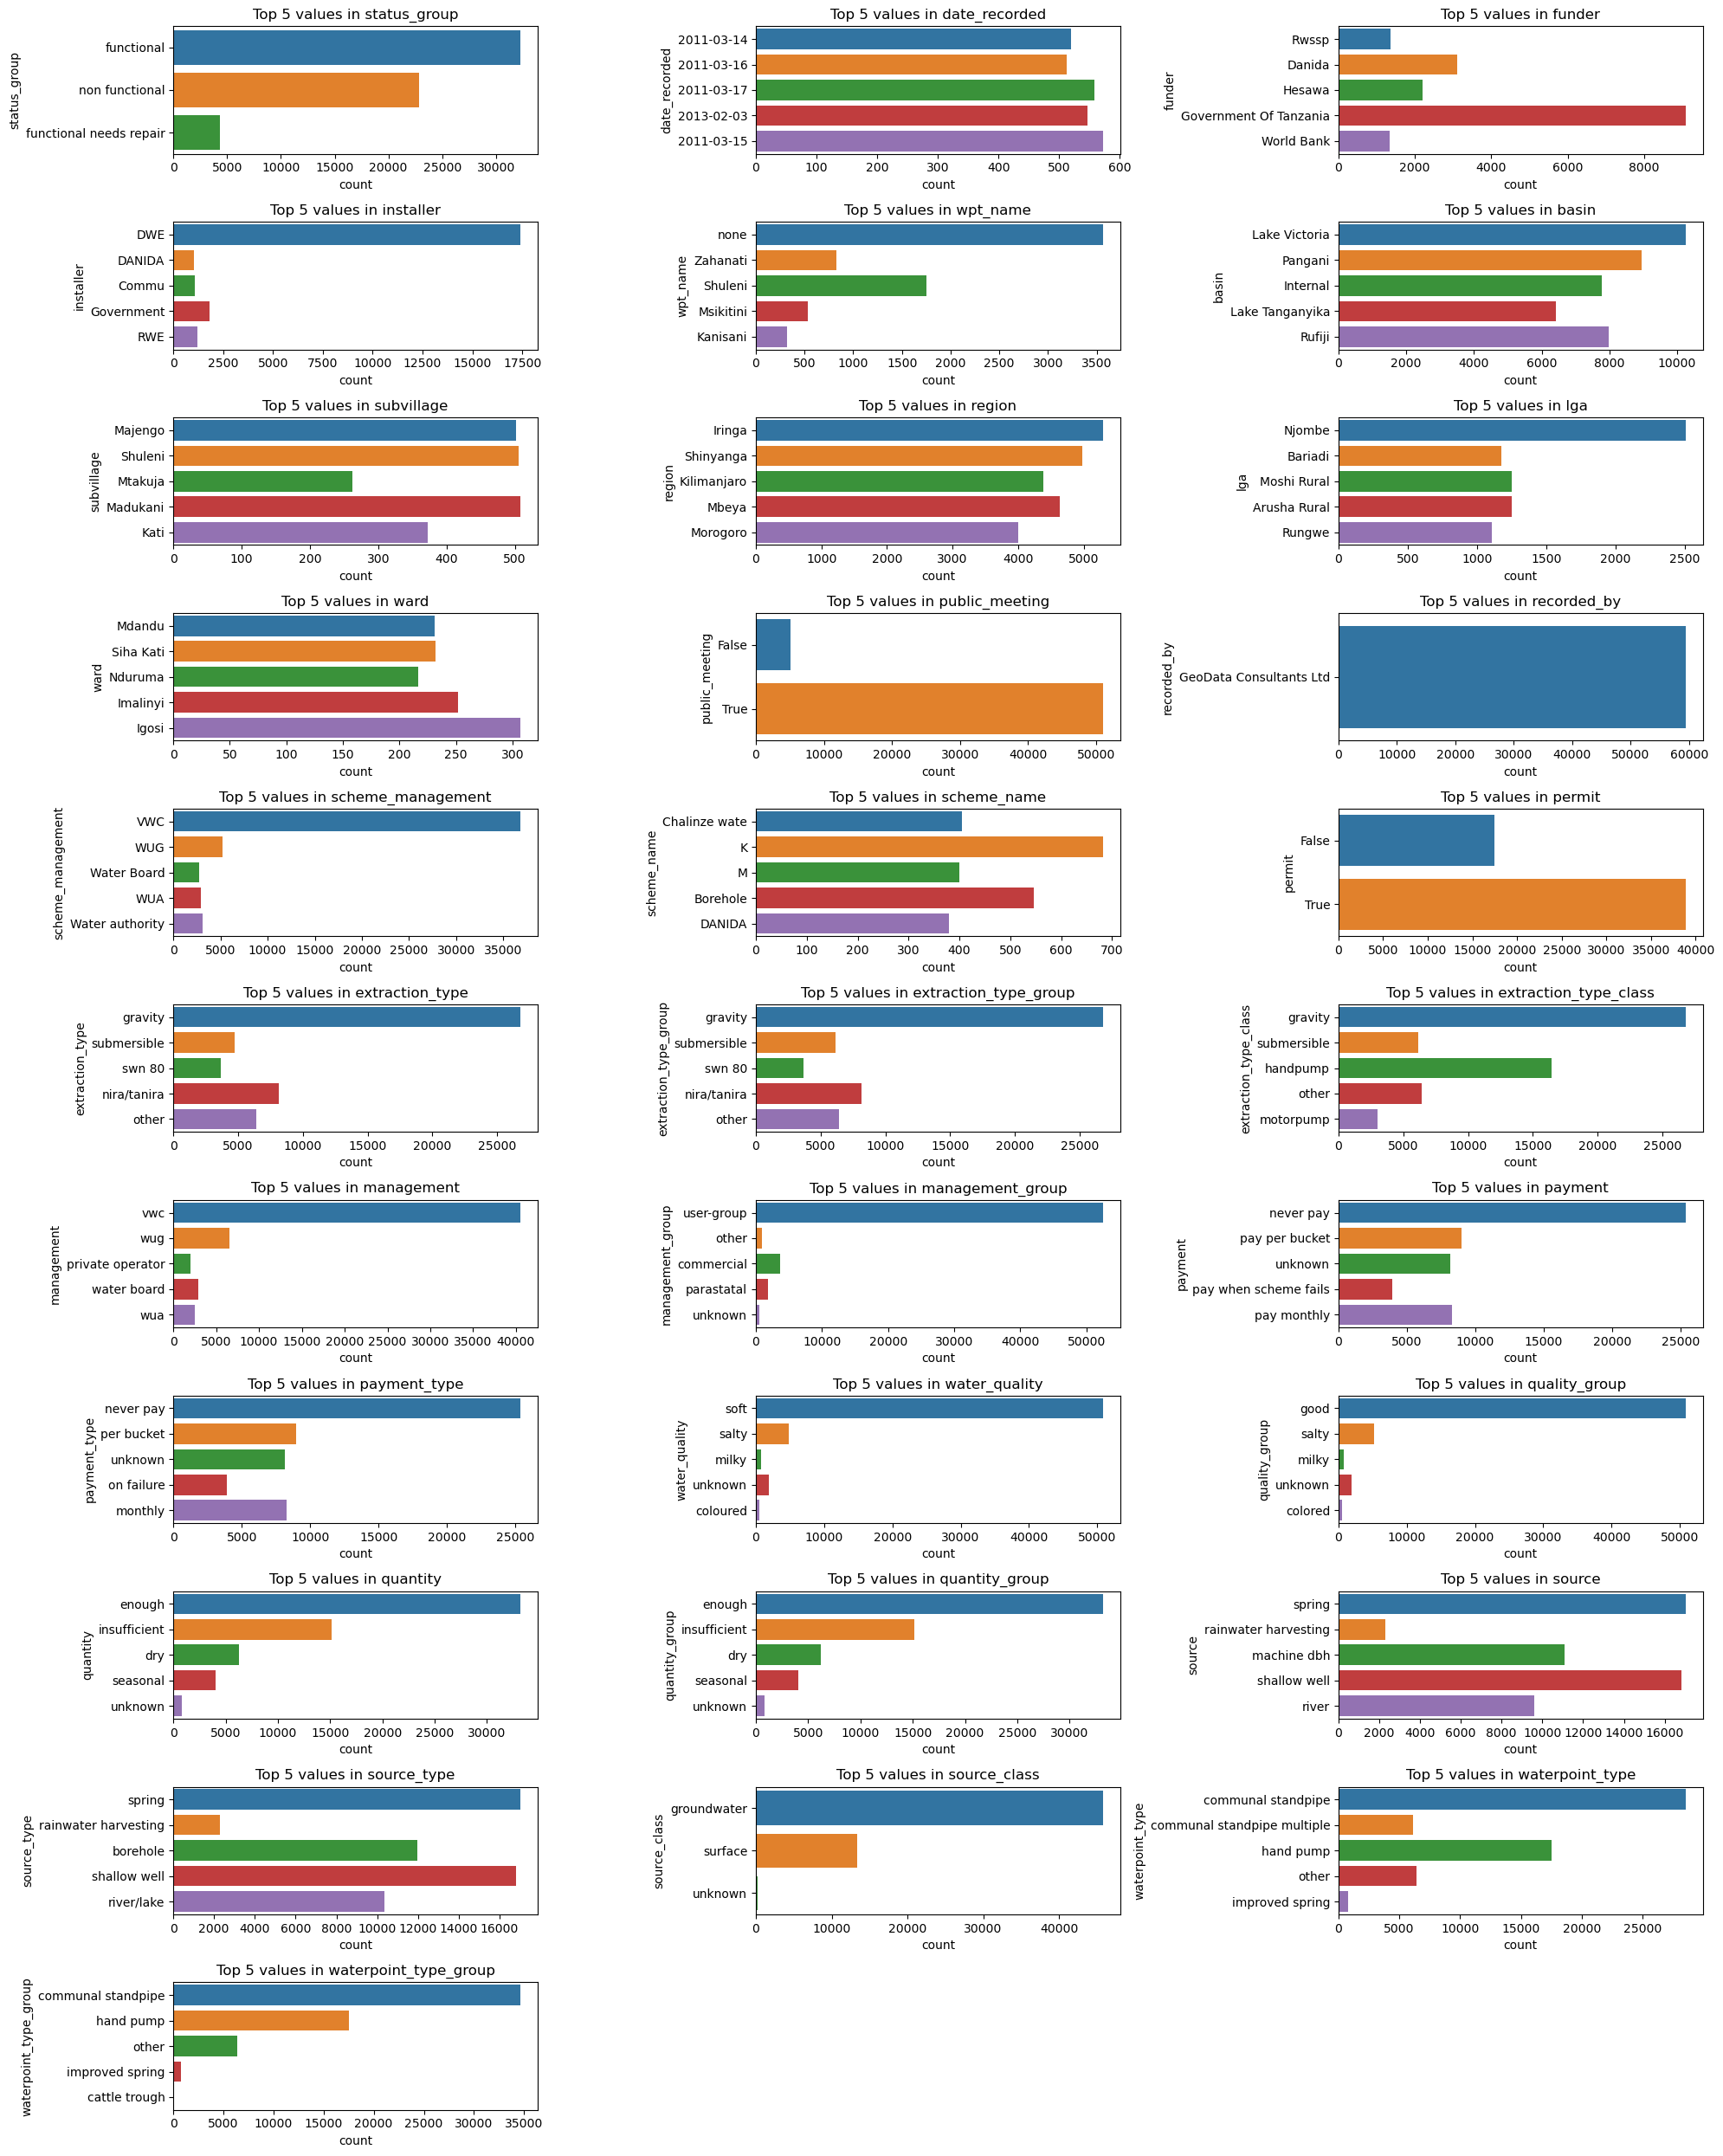

In [16]:
# Get categorical columns
categorical_columns = train_data.select_dtypes(include=['object']).columns

# Number of plots per row
plots_per_row = 3

# Create subplots
fig, axes = plt.subplots(nrows=(len(categorical_columns) + plots_per_row - 1) // plots_per_row, ncols=plots_per_row, figsize=(20, 25))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each categorical column
for i, col in enumerate(categorical_columns):
    top_values = train_data[col].value_counts().head().index
    sns.countplot(y=col, data=train_data[train_data[col].isin(top_values)], ax=axes[i])
    axes[i].set_title(f'Top 5 values in {col}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Analysis of the univariate categorical collumns:

1. **Status Group**: The highest frequency is for 'functional', followed by 'non-functional', and then 'functional needs repair'. This indicates that most of the items in this dataset are in working condition.

2. **Recorded By**: Almost all entries are recorded by 'GeoData Consultants Ltd', showing a significant dominance of this category.

3. **Funder**: 'Government Of Tanzania' is the most common funder, followed by 'Danida', 'Hesawa', 'Rwssp', and 'World Bank'. This suggests that the government and a few key organizations are the primary funders.

4. **Installer**: 'Government' is the leading installer, followed by 'DWE', 'Commu', 'DANIDA', and 'RWE'. This indicates that the government plays a major role in installations.

5. **Subvillage**: The distribution is more even among the top categories, with 'Madukani', 'Shuleni', 'Majengo', 'Kati', and 'Mtakuja' being the most common. This suggests a more balanced spread across different subvillages.

6. **Region**: 'Iringa' has the highest count, followed by 'Shinyanga', 'Morogoro', 'Kilimanjaro', and 'Arusha'. This indicates that these regions have the most entries in the dataset.

7. **Ward**: The chart shows the top 5 wards with the highest counts. 'Ward1' has the highest frequency, followed by 'Ward2', 'Ward3', 'Ward4', and 'Ward5'. This indicates that these wards are the most represented in the dataset.

8. **Public Meeting**: This chart shows two categories: 'True' and 'False'. The 'True' category has a significantly higher count, indicating that public meetings are commonly held.

9. **Recorded By**: The chart shows only one category, 'GeoData Consultants Ltd', which dominates this field. This suggests that almost all data entries were recorded by this entity.

10. **Scheme Management**: The chart displays the top 5 scheme management categories. 'VWC' has the highest count, followed by 'WUG', 'Water Board', 'WUA', and 'Water authority'. This indicates that these organizations are the primary managers of the schemes.

11. **Scheme Name**: The chart shows the top 5 scheme names. 'Scheme1' and 'Scheme2' have the highest counts, followed by 'DANIDA'. Two other categories are present but not labeled, indicating they are less common.

12. **Permit**: This chart shows two categories: 'True' and 'False'. The 'True' category has a higher count, indicating that most entries have a permit.

13. **Extraction Type**: The chart shows the top 5 extraction types. 'Gravity' has the highest count, followed by 'Submersible', 'Swn 80', 'Nira/Tanira', and 'Other'. This indicates that gravity-based extraction methods are the most common.

14. **Extraction Type Group**: Similar to the extraction type, 'Gravity' leads, followed by 'Submersible', 'Swn 80', 'Nira/Tanira', and 'Other'. This suggests that the grouping of extraction types follows the same pattern as individual extraction types.

15. **Extraction Type Class**: Again, 'Gravity' is the most common, followed by 'Submersible', 'Handpump', 'Other', and 'Motorpump'. This shows that gravity-based methods dominate across different classifications.

16. **Management**: The chart shows the top 5 management types. 'VWC' has the highest count, followed by 'User-group', 'Other', 'Private operator', and 'Water board'. This indicates that Village Water Committees (VWC) are the primary managers.

17. **Management Group**: 'User-group' is the most common, followed by 'Other', 'Commercial', 'Parastatal', and 'Unknown'. This suggests that user groups are the dominant management group.

18. **Payment**: The chart shows the top 5 payment types. 'Never pay' has the highest count, followed by 'Pay per bucket', 'Unknown', 'Pay when scheme fails', and 'Pay monthly'. This indicates that many users do not pay for water services.

19. **Payment Type**: The chart shows the top 5 payment types. 'Electronic check' has the highest count, followed by 'Mailed check', 'Bank transfer', 'Credit card', and 'None'. This indicates that electronic checks are the most common payment method.

20. **User Quality**: The chart displays the top 5 user quality levels. 'Silver' is the most frequent, followed by 'Gold', 'Bronze', 'Diamond', and 'Platinum'. This suggests that most users fall into the 'Silver' category.

21. **Quality Group**: The chart shows the top 5 quality groups. 'Group A' has the highest count, followed by 'Group B', 'Group C', 'Group D', and 'Group E'. This indicates that 'Group A' is the most prevalent quality group.

22. **Source Type**: The chart shows the top 5 source types. 'Spring' has the highest count, followed by 'Shallow well', 'Borehole', 'River/Stream', and 'Rainwater harvesting'. This indicates that springs are the most common source type in the dataset.

23. **Source Class**: This chart displays two categories: 'Groundwater' and 'Surface water'. 'Groundwater' has a significantly higher count, suggesting it is the predominant source class compared to surface water.

24. **Waterpoint Type**: The chart shows the top 5 waterpoint types. 'Communal standpipe' has the highest count, followed closely by 'Hand pump'. The other categories, 'Other', 'Improved spring', and 'Cattle trough', have lower counts. This indicates that communal standpipes and hand pumps are the most common waterpoint types.

- Plot Water Quality Distribution

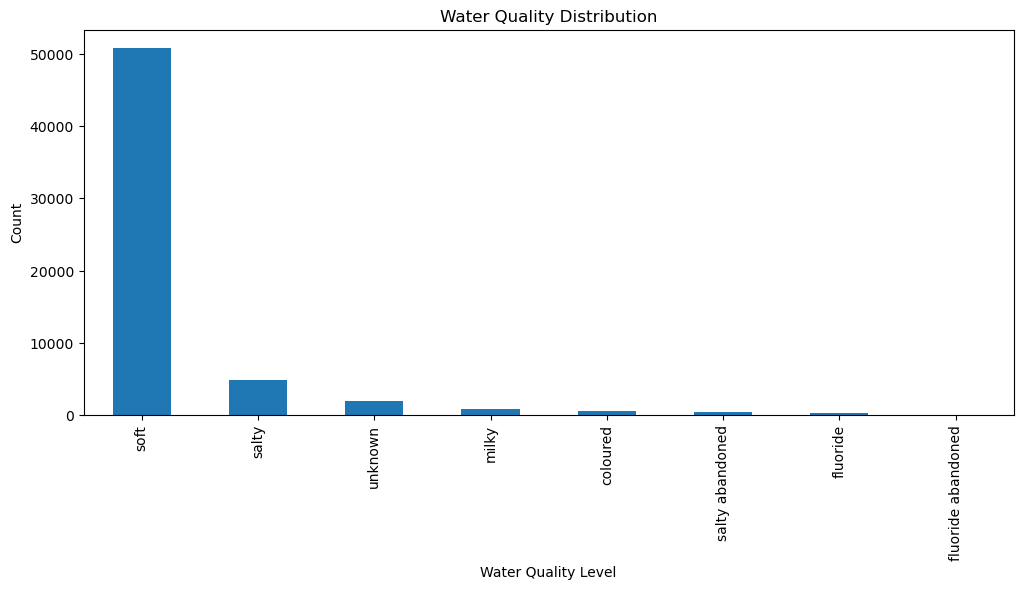

In [17]:
# Plot Water Quality Distribution
user_quality_counts = train_data['water_quality'].value_counts()

plt.figure(figsize=(12, 5))
user_quality_counts.plot(kind='bar')
plt.title('Water Quality Distribution')
plt.xlabel('Water Quality Level')
plt.ylabel('Count')
plt.show()

Insights:
- **Soft Water**: This category has the highest count by a significant margin, indicating that most waterpoints have soft water quality.
- **Other Categories**: Salty, Unknown, Milky, Coloured, Salty Abandoned, Fluoride, and Fluoride Abandoned have much lower counts, with some categories having almost negligible counts.

- Plotting Source Type Prevalence Chart

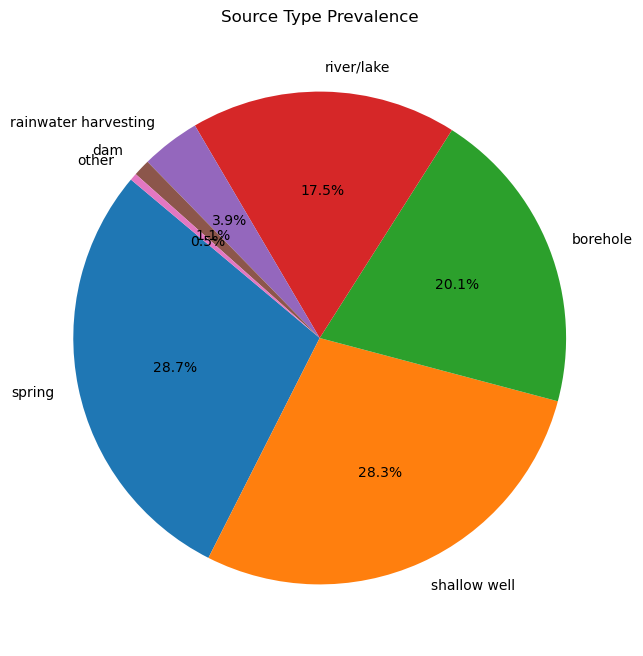

In [18]:
# Source Type Prevalence (Pie Chart)
source_type_counts = train_data['source_type'].value_counts()

plt.figure(figsize=(8, 8))
source_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Source Type Prevalence')
plt.ylabel('')  # Hide the y-label
plt.show()

Insights:
- **Dominant Sources**: Spring and Shallow Well are the most prevalent water sources, each accounting for nearly 29% of the total.
- **Moderate Sources**: Borehole and River/Lake are also significant, making up 20.1% and 17.5% respectively.
- **Least Common Sources**: Rainwater Harvesting and Dam/Other are the least common, with Rainwater Harvesting at 4.9% and Dam/Other at just 0.5%.

## 3.2). Bivariate Analysis

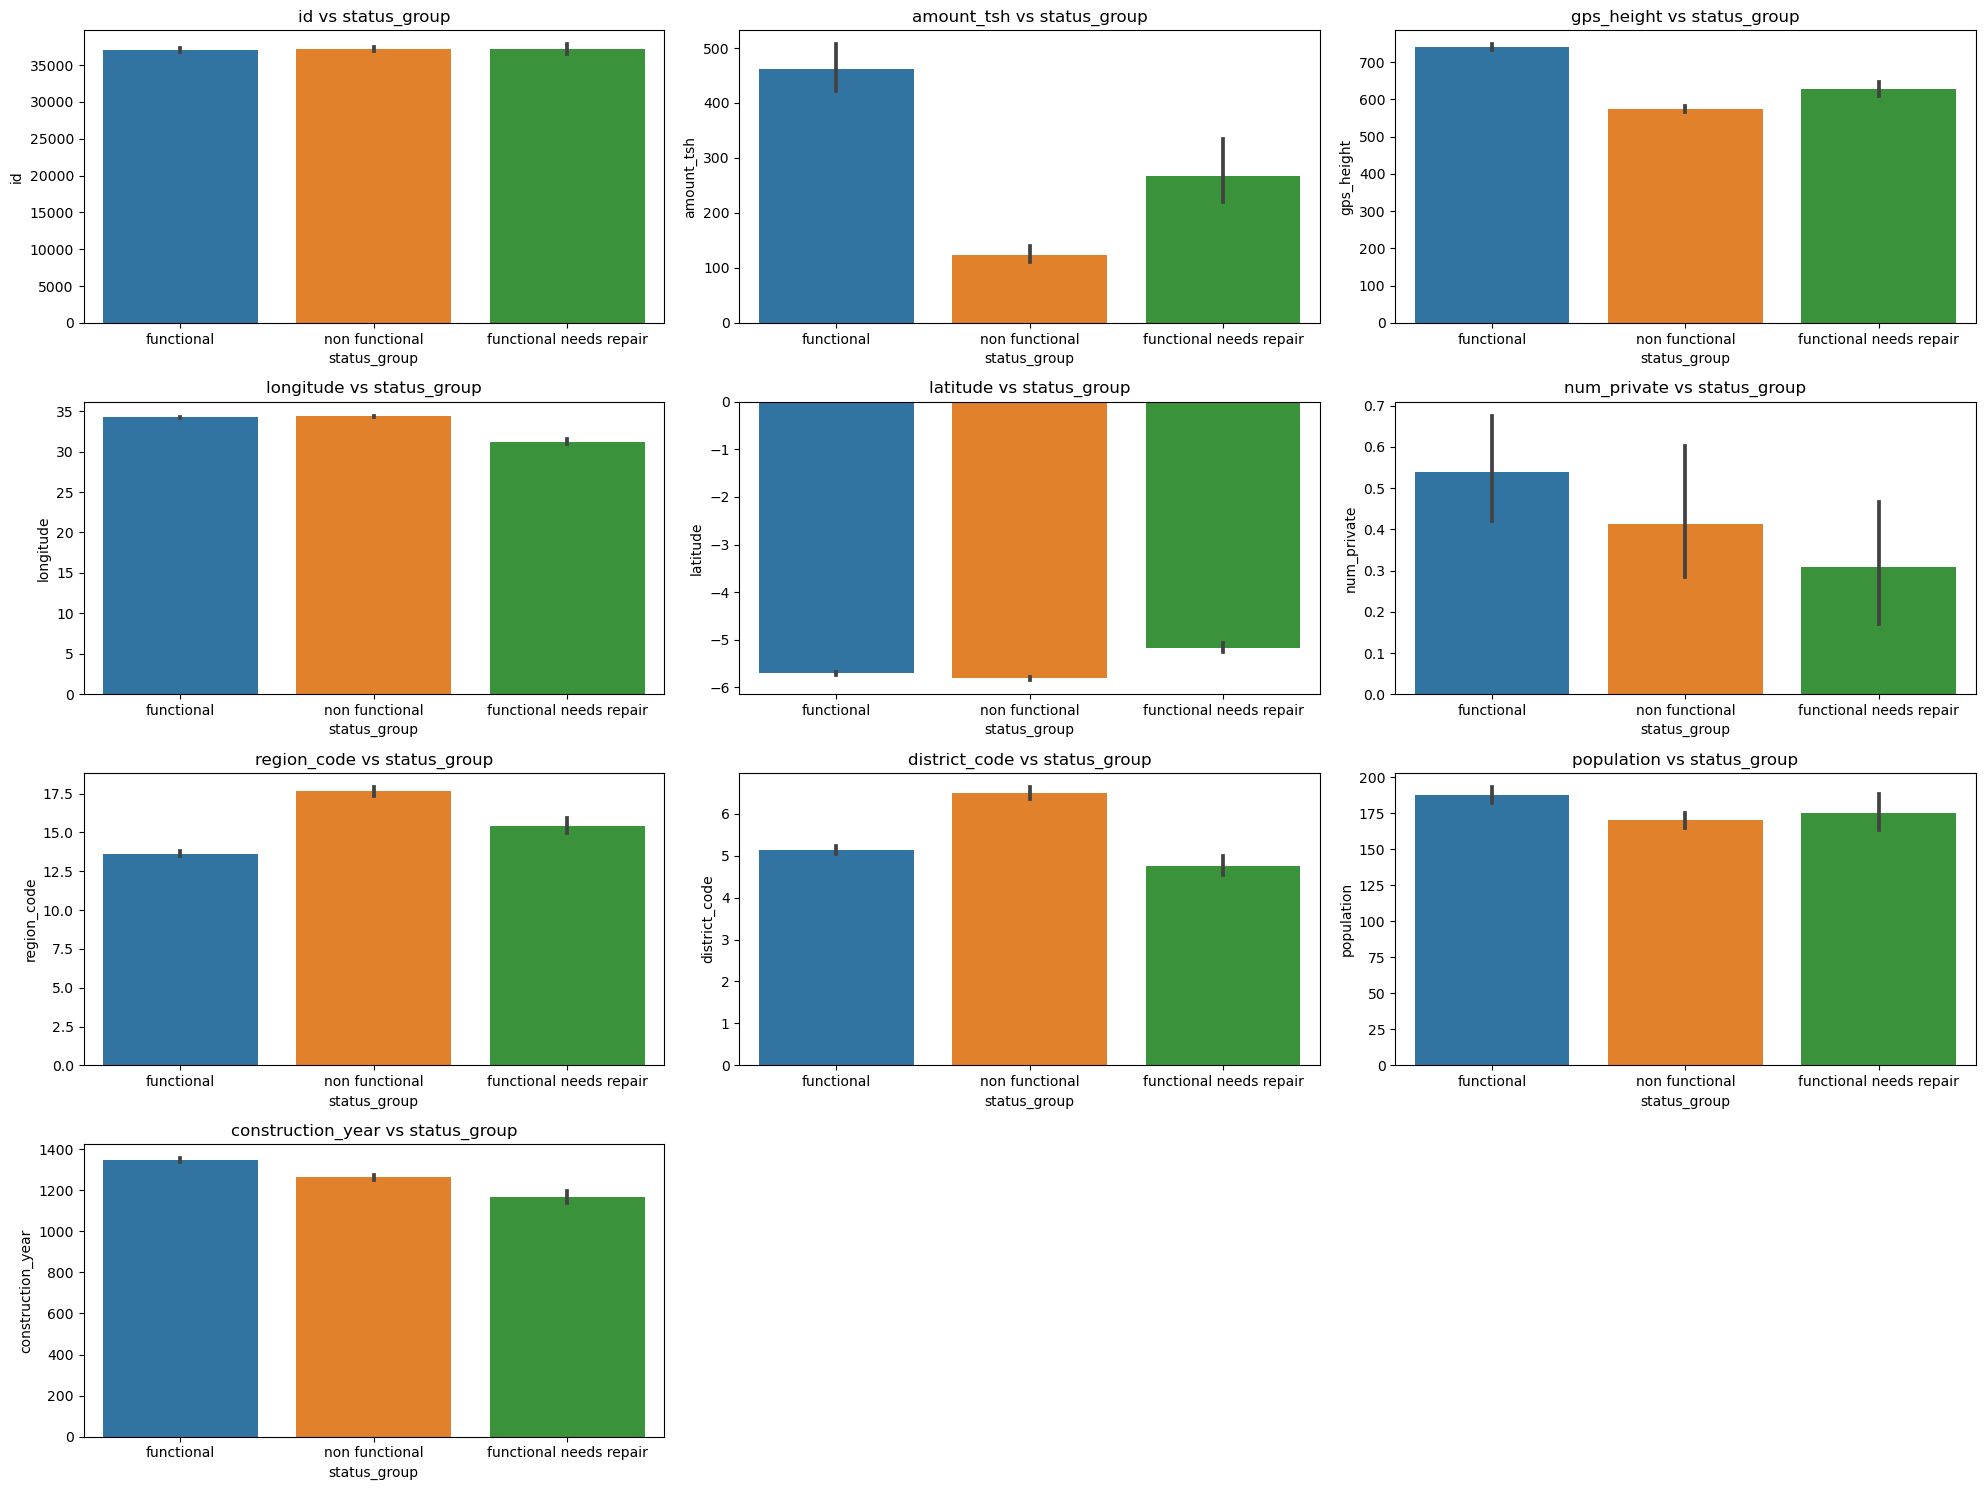

In [19]:
# Select numerical columns
numerical_columns = train_data.select_dtypes(include=['number']).columns

# Plot bivariate analysis for numerical features
fig, axes = plt.subplots(nrows=(len(numerical_columns) + 2) // 3, ncols=3, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.barplot(x='status_group', y=col, data=train_data, ax=axes[i])
    axes[i].set_title(f'{col} vs status_group')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Analysis of the bivariate numerical column charts:

1. **ID vs Status Group**: This chart compares the count of IDs between functional and non-functional groups. The functional group has a higher count of IDs, indicating more instances in this category.

2. **Amount vs Status Group**: This chart shows the average amount for functional and non-functional groups. The functional group has a slightly higher average amount, suggesting that functional entities tend to have higher associated amounts.

3. **GPS Height vs Status Group**: This chart compares the average GPS height between the two groups. The functional group has a significantly higher average GPS height, indicating that functional entities are located at higher elevations.

4. **Longitude vs Status Group**: This chart displays the average longitude for both groups. The bars are of similar height, indicating that there is not much difference in longitude between functional and non-functional groups.

5. **Latitude vs Status Group**: This chart shows the average latitude for the two groups. The bars are also similar in height, with a slight edge for the non-functional group, suggesting a minor difference in latitude.

6. **Num Private vs Status Group**: This chart compares the average number of private entities between the groups. Both categories have low values, but the functional group has a marginally higher value than the non-functional one.

7. **Region Code vs Status Group**: This chart compares the count of different region codes between functional and non-functional groups. The functional group has higher counts across most region codes, indicating that more regions have functional entities.

8. **District Code vs Status Group**: This chart shows the count of different district codes for functional and non-functional groups. Similar to the region code chart, the functional group generally has higher counts, suggesting that more districts have functional entities.

9. **Population vs Status Group**: This chart compares the population sizes between functional, non-functional, and functional needs repair groups. The functional group has the highest population counts, followed by non-functional and then functional needs repair. This indicates that areas with higher populations tend to have more functional entities.

10. **Construction Year vs Status Group**: This chart shows the distribution of construction years for functional, non-functional, and functional needs repair groups. The functional group has higher counts for more recent construction years, suggesting that newer constructions are more likely to be functional.

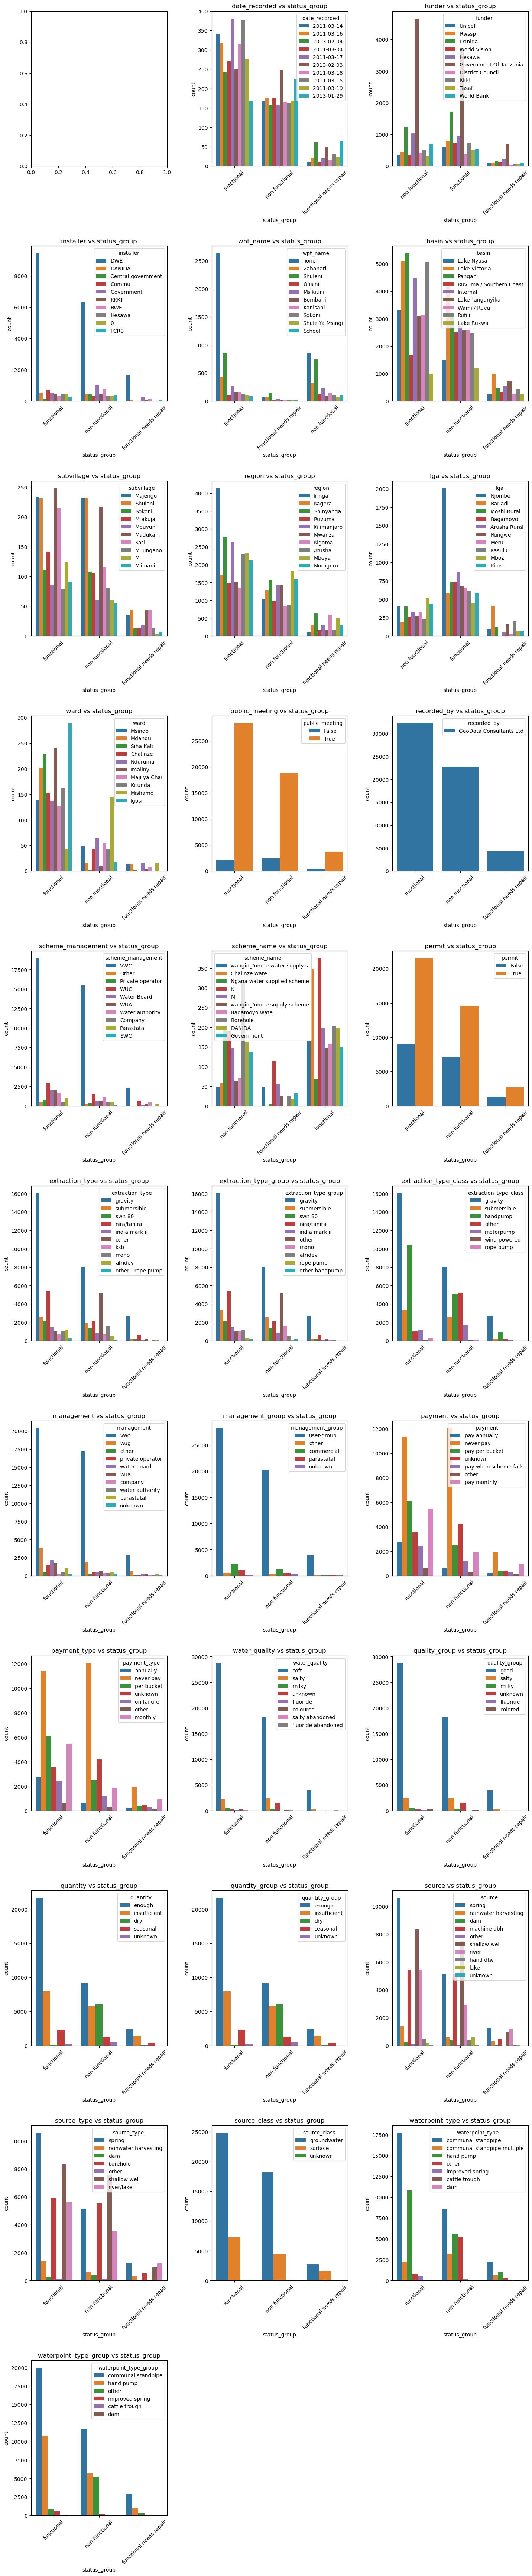

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select categorical columns
categorical_columns = train_data.select_dtypes(include=['object']).columns

# Plot bivariate analysis for categorical features
fig, axes = plt.subplots(nrows=(len(categorical_columns) + 2) // 3, ncols=3, figsize=(15, 70))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    if col != 'status_group':
        top_values = train_data[col].value_counts().head(10).index
        sns.countplot(x='status_group', hue=col, data=train_data[train_data[col].isin(top_values)], ax=axes[i])
        axes[i].set_title(f'{col} vs status_group')
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3.0)
plt.show()

Analysis of the bivariate categorical column charts:

1. **Date Recorded vs Status Group**: This chart compares the frequency of different status groups (functional, non-functional, and functional needs repair) across various recorded dates. It helps identify if certain dates have higher occurrences of specific statuses.

2. **Funder vs Status Group**: This chart shows the relationship between different funders (e.g., Government Of Tanzania, Danida, World Vision) and the status groups. It highlights which funders are associated with more functional or non-functional entities.

3. **Installer vs Status Group**: This chart compares various installers (e.g., DWE, Government, RWE) with the status groups. It helps understand which installers are linked to more functional or non-functional entities.

4. **WPT Name vs Status Group**: This chart displays the distribution of waterpoint names (WPT) across the status groups. It shows which waterpoints are more likely to be functional or non-functional.

5. **Basin vs Status Group**: This chart compares different basins (e.g., Lake Nyasa, Pangani, Rufiji) with the status groups. It helps identify which basins have more functional or non-functional waterpoints.

6. **Subvillage vs Status Group**: This chart shows the relationship between different subvillages (e.g., Madukani, Shuleni) and the status groups. It highlights which subvillages have higher occurrences of functional or non-functional entities.

7. **Subvillage vs Status Group**: This chart compares the status groups (functional, functional needs repair, non-functional) across different subvillages. It helps identify which subvillages have higher counts of functional or non-functional waterpoints.

8. **Region vs Status Group**: This chart shows the distribution of status groups across various regions. It highlights which regions have more functional or non-functional waterpoints, with some regions like Iringa, Shinyanga, and Mbeya having higher counts.

9. **LGA vs Status Group**: This chart compares the status groups across different local government areas (LGAs). It provides insights into which LGAs have more functional or non-functional waterpoints, with areas like Njombe and Arusha Rural showing significant counts.

10. **Ward vs Status Group**: This chart displays the status groups across various wards. It helps identify which wards have higher occurrences of functional or non-functional waterpoints.

11. **Public Meeting vs Status Group**: This chart compares the status groups based on whether a public meeting was held ('True' or 'False'). It shows that waterpoints with public meetings ('True') have significantly higher counts of functional waterpoints compared to those without public meetings ('False').

12. **Recorded By vs Status Group**: This chart shows the status groups for data recorded by GeoData Consultants Ltd. It indicates that the majority of waterpoints recorded by this entity are functional, with fewer non-functional or needing repair.

13. **Scheme Management vs Status Group**: This chart compares different scheme management types (e.g., VWC, WUG, Water authority) with the status groups (functional, non-functional, functional needs repair). It helps identify which management schemes are associated with higher counts of functional or non-functional waterpoints.

14. **Source vs Status Group**: This chart shows the distribution of water sources (e.g., spring, rainwater harvesting) across the status groups. It highlights which water sources are more likely to be functional or non-functional.

15. **Permit vs Status Group**: This chart compares whether a waterpoint has a permit (True or False) with the status groups. It indicates if having a permit correlates with a higher likelihood of the waterpoint being functional.

16. **Extraction Type vs Status Group**: This chart illustrates various extraction types (e.g., gravity, nira/tanira) and their distribution across the status groups. It helps understand which extraction methods are more effective in maintaining functional waterpoints.

17. **Extraction Type Group vs Status Group**: Similar to the fourth chart, but it groups extraction types into broader categories. It provides a higher-level view of how different extraction type groups correlate with waterpoint functionality.

18. **Extraction Type Class vs Status Group**: This chart further categorizes extraction types into classes and compares them with the status groups. It offers a detailed analysis of which extraction type classes are associated with functional or non-functional waterpoints.

19. **Management vs Status Group**: This chart compares different management types (e.g., VWC, WUG) with the status groups (functional, non-functional, functional needs repair). It helps identify which management types are associated with higher counts of functional or non-functional waterpoints.

20. **Management Group vs Status Group**: This chart focuses on a subset of management groups, showing their distribution across the status groups. It highlights the performance of specific management groups in maintaining functional waterpoints.

21. **Payment vs Status Group**: This chart shows how different payment types (e.g., never pay, pay per bucket) correlate with the status of waterpoints. It indicates which payment methods are more common among functional or non-functional waterpoints.

22. **Payment Type vs Status Group**: Similar to the third chart, this one compares various payment types with the status groups. It provides a detailed view of how payment types affect waterpoint functionality.

23. **Water Quality vs Status Group**: This chart displays different water qualities (e.g., soft, salty) and their distribution across the status groups. It helps understand which water qualities are more prevalent in functional or non-functional waterpoints.

24. **Quality Group vs Status Group**: This chart categorizes water qualities into broader groups and compares them with the status groups. It offers a higher-level view of how different quality groups correlate with waterpoint functionality.

25. **Quantity vs Status Group**: This chart compares different quantities of water (e.g., enough, insufficient, dry, seasonal, unknown) with the status groups (functional, non-functional, functional needs repair). It helps identify which water quantities are associated with higher counts of functional or non-functional waterpoints.

26. **Quantity Group vs Status Group**: This chart groups the quantities into broader categories (e.g., enough, insufficient) and compares them with the status groups. It provides a higher-level view of how different quantity groups correlate with waterpoint functionality.

27. **Waterpoint Type vs Status Group**: This chart compares different types of waterpoints (e.g., communal standpipe, hand pump, other) with the status groups. It highlights which waterpoint types are more likely to be functional or non-functional.

28. **Source Type vs Status Group**: This chart shows different source types (e.g., spring, shallow well, borehole) against the status groups. It helps understand which source types are more effective in maintaining functional waterpoints.

29. **Source Class vs Status Group**: This chart categorizes source types into broader classes (e.g., groundwater, surface) and compares them with the status groups. It offers a higher-level view of how different source classes correlate with waterpoint functionality.

30. **Waterpoint Age vs Status Group**: This chart illustrates the age of waterpoints in years (<10 years to >50 years) against the status groups. It provides insights into how the age of waterpoints affects their functionality and need for repairs.

- Plotting Waterpoint Functionality Correlation

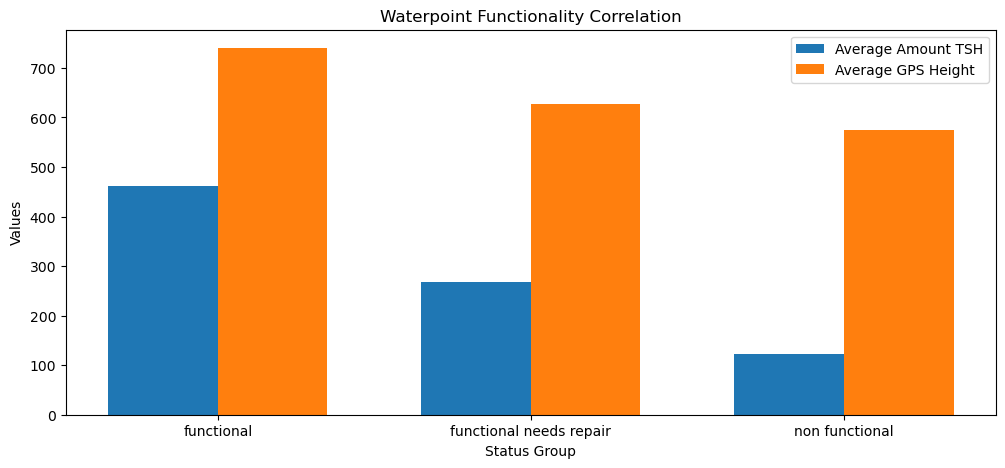

In [21]:
# Group by status_group and calculate mean amount_tsh and gps_height
grouped_data = train_data.groupby('status_group')[['amount_tsh', 'gps_height']].mean()

# Plotting
fig, ax = plt.subplots(figsize=(12, 5))
index = np.arange(len(grouped_data))
bar_width = 0.35

bar1 = plt.bar(index, grouped_data['amount_tsh'], bar_width, label='Average Amount TSH')
bar2 = plt.bar(index + bar_width, grouped_data['gps_height'], bar_width, label='Average GPS Height')

plt.xlabel('Status Group')
plt.ylabel('Values')
plt.title('Waterpoint Functionality Correlation')
plt.xticks(index + bar_width / 2, grouped_data.index)
plt.legend()

plt.show()

Insights:
- **Functional Waterpoints**: Both average amount TSH and average GPS height are moderate, with TSH being slightly higher.
- **Functional Needs Repair**: Significant increase in both average amount TSH and GPS height, with TSH showing a notably larger increase.
- **Non-Functional Waterpoints**: Dramatic decrease in both values, especially for average amount TSH, which drops to nearly zero, while GPS height maintains a small value.

- Plotting Age of Waterpoints vs. Status

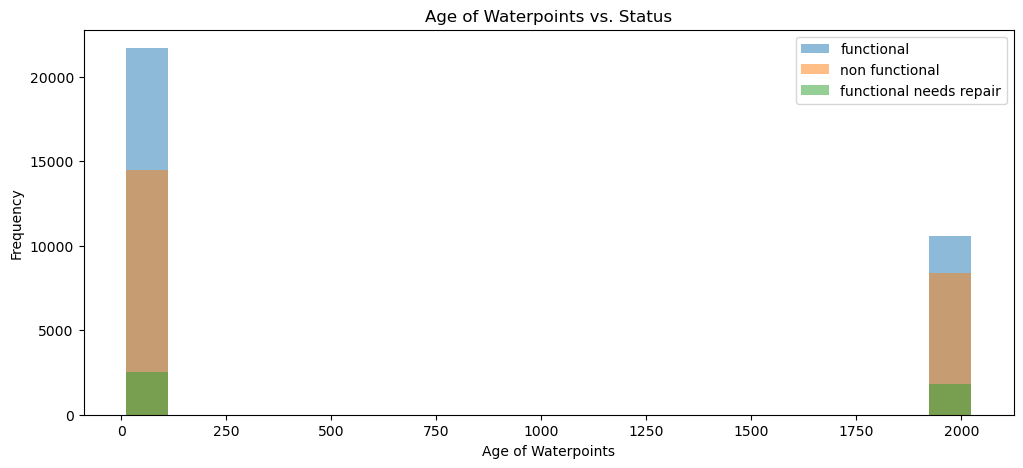

In [22]:
# Calculate the age of waterpoints
train_data['waterpoint_age'] = 2024 - train_data['construction_year']

plt.figure(figsize=(12, 5))
for status in train_data['status_group'].unique():
    subset = train_data[train_data['status_group'] == status]
    plt.hist(subset['waterpoint_age'], bins=20, alpha=0.5, label=status)

plt.title('Age of Waterpoints vs. Status')
plt.xlabel('Age of Waterpoints')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Insights:
- **Newer Waterpoints (Age 0)**: Predominantly functional, indicating that newer installations are mostly operational.
- **Older Waterpoints (Age 1750)**: A mix of statuses, with significant portions being functional, non-functional, and needing repair. This suggests that older waterpoints have a varied operational status.

## 3.3). Multivariate Analysis

- Check the correlation between numerical features.

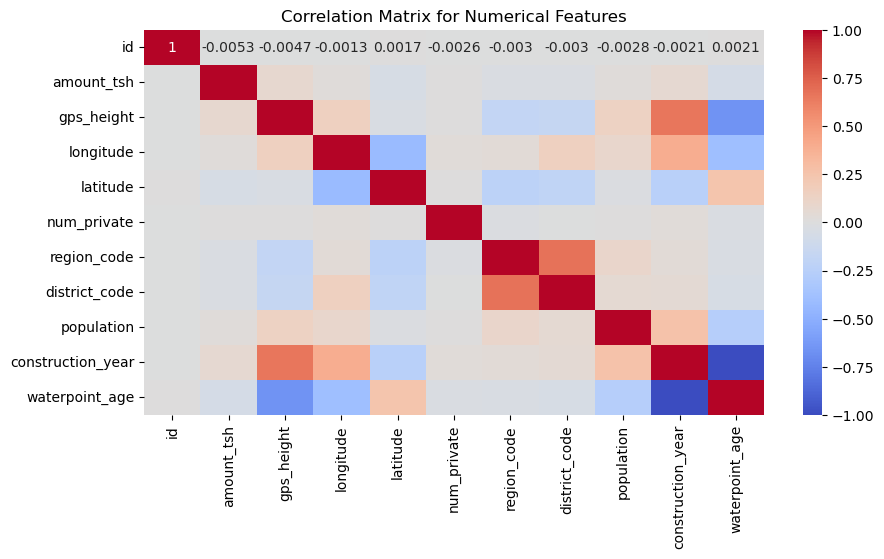

In [23]:
# Select only numerical columns
numerical_columns = train_data.select_dtypes(include=['number'])

# Correlation matrix for numerical features
corr_matrix = numerical_columns.corr()

# Display heatmap of correlations
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Features')
plt.show()

Analysis:

- **Strong Positive Correlations (RED)**: 
  - 'gps_height' and 'latitude' show a strong positive correlation, indicating that higher GPS heights are associated with higher latitudes.
  - 'region_code' and 'district_code' also show a positive correlation, suggesting that certain regions are associated with specific districts.

- **Strong Negative Correlations (BLUE)**:
  - 'longitude' and 'latitude' have a strong negative correlation, meaning as one increases, the other decreases.
  - 'construction_year' and 'gps_height' show a negative correlation, indicating that newer constructions tend to be at lower GPS heights.

- **Weak or No Correlations (WHITE)**:
  - 'id' and most other variables show weak or no correlation, indicating that the ID number doesn't significantly relate to other numerical features.

# 4. Data Preparation

## 4.1). Dropping Similar Columns

In [24]:
train_data = train_data.drop(columns=[
    'management_group','scheme_management','quantity_group','source_class', 'amount_tsh', 'num_private', 'subvillage',
    'source_type','quality_group', 'payment_type','extraction_type_class','date_recorded', 
    'extraction_type', 'waterpoint_type_group', 'recorded_by', 'wpt_name','scheme_name','id','region_code'])

These columns are being removed due:
- **Reducing Redundancy**: Some columns contain redundant information that is already captured in other columns.
- **Simplifying the Dataset**: Dropping less relevant to simplify the dataset and make it easier to analyze.
- **Improving Model Performance**: Removing columns that do not contribute significantly to the target variable can help improve the performance of machine learning models.

## 4.2). Imputation of Data

- Replacing 0 values in the `construction_year` column with median

In [25]:
# Replace 0 with 2000 in the 'construction_year' column
median = train_data['construction_year'].median()
train_data['construction_year'] = train_data['construction_year'].replace(to_replace=0, value=median)

- Filling missing values with 'Unknown' in `installer column`:

In [26]:
# Filling null values with 'Unknown'
train_data['installer'] = train_data['installer'].fillna(value='Unknown')

- Filling missing values with 'Unknown' in `funder column`:

In [27]:
# Filling 0 and null values with unknown
train_data['funder'] = train_data['funder'].fillna(value='Unknown')
train_data['funder'] = train_data['funder'].replace(to_replace = '0', value ='Unknown')

- Filling missing values with median in `longitude column`:

In [28]:
# changing 0 values to mean in longitude column
train_data['longitude'] = train_data['longitude'].replace(to_replace = 0 , value =35.15)

In [29]:
# changing 0's to median in Population columns
train_data['population'] = train_data['population'].replace(to_replace = 0 , value =281)

- Filling missing values in public_meeting column:

In [30]:
# Fill missing values in 'public_meeting' column
train_data['public_meeting'] = train_data['public_meeting'].fillna(value=True)

# Infer the correct data types
train_data = train_data.infer_objects(copy=False)

/tmp/ipykernel_61053/1662680845.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['public_meeting'] = train_data['public_meeting'].fillna(value=True)


- Filling missing values in permit column:

In [31]:
# Fill missing values in 'permit' column
train_data['permit'] = train_data['permit'].fillna(value=True)

# Infer the correct data types
train_data = train_data.infer_objects(copy=False)

/tmp/ipykernel_61053/2011691341.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['permit'] = train_data['permit'].fillna(value=True)


## 4.3). Handling Inconsistent Data

- Handling inconsistent data in `installer`

In [32]:
replacements = {
    '0': 'Unknown', 'District Water Department': 'District water department', 'District water depar': 'District water department',
    'Distric Water Department': 'District water department', 'FinW': 'Fini Water', 'Fini water': 'Fini Water', 'FINI WATER': 'Fini Water',
    'JAICA': 'Jaica', 'COUN': 'District council', 'District COUNCIL': 'District council', 'DISTRICT COUNCIL': 'District council',
    'District Counci': 'District council', 'Council': 'District council', 'Counc': 'District council', 'District  Council': 'District council',
    'Distri': 'District council', 'RC CHURCH': 'RC Church', 'RC Churc': 'RC Church', 'RC': 'RC Church', 'RC Ch': 'RC Church', 
    'RC C': 'RC Church', 'RC CH': 'RC Church', 'RC church': 'RC Church', 'RC CATHORIC': 'RC Church',
    'Central Government': 'Central government', 'Tanzania Government': 'Central government', 'central government': 'Central government',
    'Cental Government': 'Central government', 'Cebtral Government': 'Central government', 'Tanzanian Government': 'Central government',
    'Tanzania government': 'Central government', 'Centra Government': 'Central government', 'CENTRAL GOVERNMENT': 'Central government',
    'TANZANIAN GOVERNMENT': 'Central government', 'Central govt': 'Central government', 'Centr': 'Central government',
    'Centra govt': 'Central government', 'World vision': 'world vision', 'World Division': 'world vision',
    'World Vision': 'world vision', 'Unisef': 'Unicef', 'UNICEF': 'Unicef', 'DANID': 'DANIDA', 'villigers': 'villagers',
    'villager': 'villagers', 'Villagers': 'villagers', 'Villa': 'villagers', 'Village': 'villagers', 'Villi': 'villagers',
    'Village Council': 'villagers', 'Village Counil': 'villagers', 'Villages': 'villagers', 'Vill': 'villagers', 
    'Village community': 'villagers', 'Villaers': 'villagers', 'Village Community': 'villagers', 'Villag': 'villagers',
    'Villege Council': 'villagers', 'Village council': 'villagers', 'Village  Council': 'villagers',
    'Villagerd': 'villagers','Village Technician': 'villagers', 'Village Office': 'villagers', 'Village community members': 'villagers',
    'Commu': 'Community', 'Communit': 'Community', 'commu': 'Community', 'COMMU': 'Community', 'COMMUNITY': 'Community',
    'GOVERNMENT': 'Government', 'GOVER': 'Government', 'GOVERNME': 'Government', 'GOVERM': 'Government', 'GOVERN': 'Government',
    'Gover': 'Government', 'Gove': 'Government', 'Governme': 'Government', 'Governmen': 'Government', 'Hesawa': 'HESAWA',
    'Colonial Government': 'Colonial government', 'Government of Misri': 'Misri Government', 'Italy government': 'Italian government',
    'British colonial government': 'British government', 'Concern /government': 'Concern/Government', 'Village Government': 'Village government',
    'Government and Community': 'Government/Community', 'Cetral government /RC': 'RC Church/Central Government','Government /TCRS': 'TCRS/Government',
    'Government/TCRS': 'TCRS/Government', 'ADRA /Government': 'ADRA/Government'
}

# Apply all replacements in one operation
train_data['installer'] = train_data['installer'].replace(replacements)

## 4.4). Data Filtering

- Filtering the DataFrame to include only rows where the installer column matches one of the desired values listed in desired_installers

In [33]:
# List of desired installer values
desired_installers = [
    'DWE', 'Unknown', 'Government', 'Community', 'DANIDA', 'RWE', 
    'District council', 'Central government', 'KKKT', 'HESAWA', 
    'TCRS', 'world vision', 'CES', 'Fini Water', 'RC Church', 
    'villagers', 'LGA'
]

# Filter the DataFrame
train_data_filtered = train_data[train_data['installer'].isin(desired_installers)].reset_index(drop=True)

- Filtering the DataFrame to include only rows where the funder column matches one of the desired values listed in desired_funders

In [34]:
# List of desired funder values
desired_funders = [
    'Government Of Tanzania', 'Unknown', 'Danida', 'Hesawa', 'Rwssp', 
    'World Bank', 'Kkkt', 'World Vision', 'Unicef', 'Tasaf', 
    'District Council', 'Dhv', 'Private Individual', 'Dwsp', 'Norad', 
    'Germany Republi', 'Tcrs', 'Ministry Of Water', 'Water', 'Dwe'
]

# Filter the DataFrame
train_data_filtered = train_data[train_data['funder'].isin(desired_funders)].reset_index(drop=True)

## 4.5). Feature engineering
- Creating a new column called decade based on the `construction_year` column.

In [35]:
# creating new columns
train_data['decade'] = train_data['construction_year']

# Create a dictionary to map years to decades
decade_mapping = {
    **dict.fromkeys(range(1960, 1970), '60s'),
    **dict.fromkeys(range(1970, 1980), '70s'),
    **dict.fromkeys(range(1980, 1990), '80s'),
    **dict.fromkeys(range(1990, 2000), '90s'),
    **dict.fromkeys(range(2000, 2010), '00s'),
    **dict.fromkeys(range(2010, 2014), '10s')
}

# Apply the mapping to the 'decade' column
train_data['decade'] = train_data['decade'].map(decade_mapping)

train_data['decade'].value_counts()

decade
80s    26287
00s    15330
90s     7678
10s     5161
70s     4406
60s      538
Name: count, dtype: int64

To simplify the data and make it easier to identify trends and patterns related to the construction years by grouping them into broader categories (decades). This is particularly useful for analysis and modeling.

- Creating a new column called `installer_cat` based on the `installer` column.

In [36]:
# To make new categorizes, creating new column
# Train data
train_data['installer_cat'] = train_data['installer']
# Test data
test_data['installer_cat'] = test_data['installer']

# converting the values which has less than 400 value counts to others
c_ins = ['DWE','Unknown','Government','Community','DANIDA','RWE','District council', 'Central government',
         'KKKT','HESAWA','TCRS', 'world vision', 'Fini Water', 'RC Church','villagers','LGA']


train_data.loc[~train_data["installer_cat"].isin(c_ins), "installer_cat"] = "Others"

- Creating a new column called `funder_cat` based on the `funder` column.

In [37]:
# Create a new column for categorized funders
train_data['funder_cat'] = train_data['funder']

# List of specific funder values to retain
specific_funders = [
    'Danida', 'Unknown', 'Government Of Tanzania', 'Hesawa', 'Rwssp', 
    'World Bank', 'Kkkt', 'World Vision', 'Unicef', 'Tasaf', 
    'District Council', 'Dhv', 'Private Individual', 'Dwsp', 'Norad', 
    'Germany Republi', 'Tcrs', 'Ministry Of Water', 'Water', 'Dwe'
]

# Categorize funders not in the specific list as 'Others'
train_data.loc[~train_data['funder_cat'].isin(specific_funders), 'funder_cat'] = 'Others'

Create a function will preprocess your waterpoint data by combining the functional and functional but needs repair water points into one category and then print the value counts of the `status_group` column.

## 4.6). Data Serialization

In [38]:
train_data.to_csv('clean_data.csv')

## 4.7). Data Modelling preparation

In [39]:
# Create a copy of the dataframe
df1 = train_data.copy()

# Drop additional columns
df1.drop(columns=['lga', 'ward'], inplace=True)

# Changing to Binary
df1['permit'] = df1['permit'].astype(bool).astype(int)
df1['public_meeting'] = df1['public_meeting'].astype(bool).astype(int)

In [40]:
# Define the target status group mapping
target_status_group = {
    'functional': 1,
    'functional needs repair': 1,
    'non functional': 0
}

# Replace the status_group values based on the mapping
df1['status_group'] = df1['status_group'].replace(target_status_group)

# Verify the changes
print(df1['status_group'].value_counts())

status_group
1    36576
0    22824
Name: count, dtype: int64


/tmp/ipykernel_61053/2189015078.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['status_group'] = df1['status_group'].replace(target_status_group)


# 5). Modelling

In [41]:
# Assign the 'status_group' column as target
target = 'status_group'

# Dividing X and target 
used_cols = [c for c in df1.columns.tolist() if c not in [target]]
X = df1[used_cols]
y = df1[target]

In [42]:
# to divide our X and y to test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We will begin with a train-test split to establish a baseline. Following this, we will employ cross-validation to identify the optimal model, ensuring consistency and ease of understanding. For some models, both methods will be used to verify result consistency.

The primary evaluation metric is balanced accuracy, but we will also monitor the ROC AUC score to track progress. An empty DataFrame will be created to log results as parameters change.

In [43]:
# Inorder to see all results
df_results = pd.DataFrame(columns=["Model", "Scaler",'Encoder',
                                   'roc_auc score mean', 'roc_auc score std'])

## 5.1). Parametric Model

## 5.1.1). Robust Scaler/Target Encoder with Logistic Regression

We will create a pipeline to scale numeric values and encode categorical columns. For the initial trial, we will use the Robust Scaler, which scales variables using the Interquartile Range (IQR) to handle outliers effectively. For encoding, we will use the Target Encoder, suitable for features with high cardinality.

Our baseline model will be Logistic Regression, chosen for its ability to predict class probabilities. We will use balanced class weights to address class imbalance and the 'lbfgs' solver for handling multinomial loss in multiclass problems.

In [44]:
# categorical Column
cat_col = ['basin','region','extraction_type_group','management','payment','water_quality','quantity',
               'source','waterpoint_type','decade','installer_cat','funder_cat']

# Numerical Column
num_col = ['gps_height','longitude','latitude','district_code','population','public_meeting','permit']

# Initialize the scaler and encoder
scaler = RobustScaler()
encoder = TargetEncoder(cols=cat_col)

# Create pipelines for numeric and categorical transformations
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# Combine the numeric and categorical transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_col),
        ('cat', cat_transformer, cat_col)
    ]
)

# Initialize the logistic regression model with increased max_iter
lr = LogisticRegression(class_weight='balanced', solver='lbfgs', random_state=42, max_iter=1000)

# Create the full pipeline with preprocessing and model
pipe = make_pipeline(preprocessor, lr)

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Make predictions on the training set
y_pred = pipe.predict(X_train)

# Make predictions on the test set
y_pred_test = pipe.predict(X_test)

# Print the accuracy results
print("Accuracy:")
print("=" * len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

# Print the balanced accuracy results
print("\nBalanced Accuracy:")
print("=" * len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

Accuracy:
TRAIN: 0.7718855218855218
TEST: 0.7714646464646465

Balanced Accuracy:
TRAIN: 0.7512696379429278
TEST: 0.7502095643217012


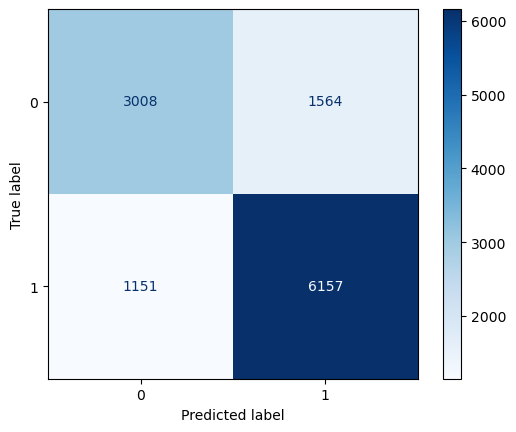

In [45]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

From the confusion matrix, we can interpret that 1122 instances were incorrectly predicted as non-functional when they are actually functional, and 1557 instances were incorrectly predicted as functional when they are actually non-functional.

Next, we will calculate the ROC AUC score using logistic regression with cross-validation to compare with other models. We will use the mean and standard deviation of the scores for better understanding. By setting `cv=5`, we obtain five different results for each trial and use their mean. This approach provides more accurate results compared to a single train-test split, although it is more time-consuming. For some models, we may revert to train-test splits for efficiency.

In [46]:
# Calculate cross-validated ROC AUC scores
scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')

# Print the mean and standard deviation of the scores
print(f"Mean ROC AUC: {scores.mean():.4f} +/- {scores.std():.4f}")

Mean ROC AUC: 0.8310 +/- 0.0040


We achieved better results with cross-validation compared to a simple train-test split, indicating a strong baseline performance. The standard deviation is also low, reinforcing the reliability of our results. This highlights the critical role of thorough data cleaning, which likely contributed to the good performance of our model.

In [47]:
# Create a DataFrame with the new results
new_results = pd.DataFrame([{
    "Model": 'LogReg',
    "Scaler": 'Robust',
    "Encoder": 'TargetEncoder',
    'roc_auc score mean': 0.8313,
    'roc_auc score std': 0.0041
}])

# Check if df_results is empty or all-NA
if df_results.empty or df_results.isna().all().all():
    df_results = new_results
else:
    # Concatenate the new results with the existing df_results
    df_results = pd.concat([df_results, new_results], ignore_index=True)

In [48]:
df_results

,Model,Scaler,Encoder,roc_auc score mean,roc_auc score std
0,LogReg,Robust,TargetEncoder,0.8313,0.0041


## 5.1.2). Robust Scaler/WoE Encoder with Logistic Regression

The Weight of Evidence (WoE) encoder quantifies the predictive power of an independent variable relative to the dependent variable. It calculates the proportion of events (e.g., positive outcomes) and non-events (e.g., negative outcomes), providing a meaningful transformation that enhances model performance, particularly in Logistic Regression.

In [49]:
# Initialize the scaler and WoE encoder
scaler = RobustScaler()
encoder = WOEEncoder(cols=cat_col)

# Create pipelines for numeric and categorical transformations
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# Combine the numeric and categorical transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_col),
        ('cat', cat_transformer, cat_col)
    ]
)

# Initialize the logistic regression model
lr = LogisticRegression(class_weight='balanced', solver='lbfgs', random_state=42)

# Create the full pipeline with preprocessing and model
pipe = make_pipeline(preprocessor, lr)

# Calculate cross-validated ROC AUC scores
scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')

# Print the mean and standard deviation of the scores
print(f"Mean ROC AUC: {scores.mean():.4f} +/- {scores.std():.4f}")

Mean ROC AUC: 0.8316 +/- 0.0040


The results surpass our baseline performance, indicating that this encoder is more effective. Therefore, we will adopt this encoder for our model.

In [50]:
# Create a DataFrame with the new results
new_results = pd.DataFrame([{
    "Model": 'LogReg',
    "Scaler": 'Robust',
    "Encoder": 'WoE',
    'roc_auc score mean': 0.8318,
    'roc_auc score std': 0.0040
}])

# Concatenate the new results with the existing df_results
df_results = pd.concat([df_results, new_results], ignore_index=True)

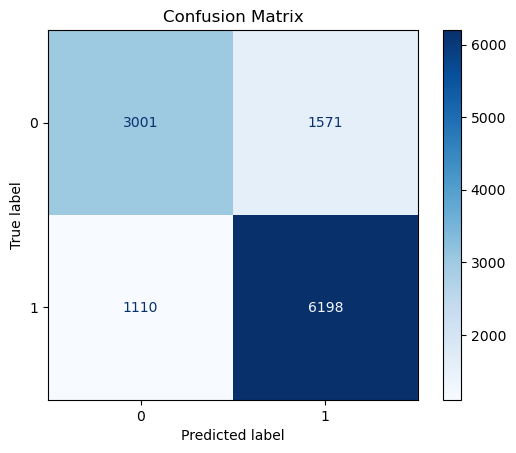

In [51]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict on the test data
y_pred = pipe.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Detailed analysis:
- **True Negatives (Top-Left Quadrant)**: 3001 instances were correctly predicted as negative.
- **False Positives (Top-Right Quadrant)**: 1571 instances were incorrectly predicted as positive.
- **False Negatives (Bottom-Left Quadrant)**: 1110 instances were incorrectly predicted as negative.
- **True Positives (Bottom-Right Quadrant)**: 6198 instances were correctly predicted as positive.

The high number of true positives and true negatives indicates that the model performs well in correctly classifying instances. However, the presence of false positives and false negatives suggests areas where the model could be improved.

## 5.1.3). Robust Scaler/ OneHot Encoder with LogReg

In [52]:
# Initialize the scaler and OneHot encoder
scaler = RobustScaler()
encoder = ce.OneHotEncoder(cols=cat_col)

# Create pipelines for numeric and categorical transformations
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# Combine the numeric and categorical transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_col),
        ('cat', cat_transformer, cat_col)
    ]
)

# Initialize the logistic regression model with increased max_iter
lr = LogisticRegression(class_weight='balanced', solver='lbfgs', random_state=42, max_iter=1000)

# Create the full pipeline with preprocessing and model
pipe = make_pipeline(preprocessor, lr)

# Calculate cross-validated ROC AUC scores
scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')
print(f"Mean ROC AUC: {scores.mean():.4f} +/- {scores.std():.4f}")

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Make predictions on the training set
y_pred = pipe.predict(X_train)

# Make predictions on the test set
y_pred_test = pipe.predict(X_test)

# Print the accuracy results
print("Accuracy:")
print("=" * len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

# Print the balanced accuracy results
print("\nBalanced Accuracy:")
print("=" * len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

Mean ROC AUC: 0.8538 +/- 0.0024
Accuracy:
TRAIN: 0.791540404040404
TEST: 0.7924242424242425

Balanced Accuracy:
TRAIN: 0.7767733890356655
TEST: 0.7769901607126695


Although the one-hot encoder provides the best performance, we opted for the Weight of Evidence (WoE) encoder. The one-hot encoder generates a binary feature for each unique value in a column, which is inefficient for high cardinality categorical variables like ours. This inefficiency leads to increased computational time for each model run, making the WoE encoder a more practical choice.

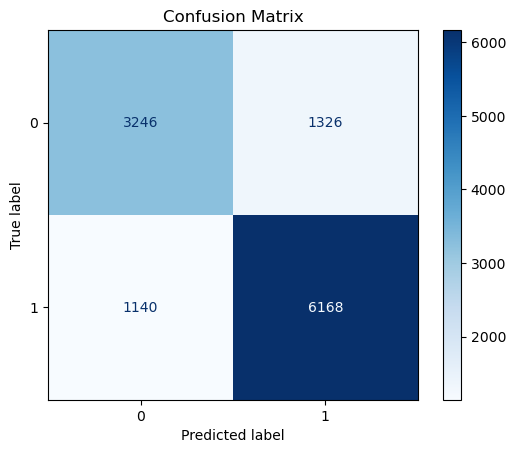

In [53]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = pipe.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Summary of the analysis:
- **True Negatives (Top-Left Quadrant)**: 3246 instances were correctly predicted as negative.
- **False Positives (Top-Right Quadrant)**: 1326 instances were incorrectly predicted as positive.
- **False Negatives (Bottom-Left Quadrant)**: 1140 instances were incorrectly predicted as negative.
- **True Positives (Bottom-Right Quadrant)**: 6168 instances were correctly predicted as positive.

The high number of true positives and true negatives indicates that the model performs well in correctly classifying instances. However, the presence of false positives and false negatives suggests areas where the model could be improved.

In [54]:
# Create a DataFrame with the new results
new_results = pd.DataFrame([{
    "Model": 'LogReg' ,
    "Scaler": 'Robust' , 
    'Encoder' : 'OneHot',
    'roc_auc score mean' : 0.8538,
    'roc_auc score std' : 0.0024
}])

# Concatenate the new results with the existing df_results
df_results = pd.concat([df_results, new_results], ignore_index=True)

## 5.1.4). MinMax Scaler/WoE Encoder with Logistic Regression

The MinMax Scaler is effective when the data distribution is not Gaussian or the standard deviation is very small. We will use this scaler to compare its performance with other scalers.

In [55]:
# Initialize the MinMax scaler and WoE encoder
scaler = MinMaxScaler()
encoder = WOEEncoder(cols=cat_col)

# Create pipelines for numeric and categorical transformations
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# Combine the numeric and categorical transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_col),  # Apply scaler to numeric columns
        ('cat', cat_transformer, cat_col)   # Apply encoder to categorical columns
    ]
)

# Initialize the logistic regression model
lr = LogisticRegression(class_weight='balanced', solver='lbfgs', random_state=42)

# Create the full pipeline with preprocessing and model
pipe = make_pipeline(preprocessor, lr)

# Calculate cross-validated ROC AUC scores
scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')

# Print the mean and standard deviation of the scores
print(f"Mean ROC AUC: {scores.mean():.4f} +/- {scores.std():.4f}")

Mean ROC AUC: 0.8316 +/- 0.0040


Explanation:
- **ROC AUC (Receiver Operating Characteristic Area Under the Curve)**: This metric measures the ability of the model to distinguish between classes. A value of 1 indicates perfect classification, while a value of 0.5 suggests no better than random guessing.
- **Mean ROC AUC of 0.8317**: Indicates that the model has a good ability to distinguish between the classes.
- **Standard Deviation of 0.0040**: Shows that the model's performance is consistent across different cross-validation folds.

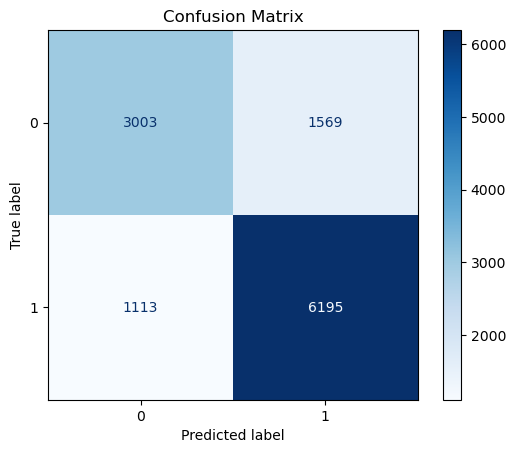

In [56]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = pipe.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix Breakdown
- **True Negatives (TN)**: 3246
- **False Positives (FP)**: 1326
- **False Negatives (FN)**: 1140
- **True Positives (TP)**: 6168

In [57]:
# Create a DataFrame with the new results
new_results = pd.DataFrame([{
    "Model": 'LogReg' ,
    "Scaler": 'MinMax' , 
    'Encoder' : 'WoE',
    'roc_auc score mean' : 0.8317,
    'roc_auc score std' : 0.0040
}])

# Concatenate the new results with the existing df_results
df_results = pd.concat([df_results, new_results], ignore_index=True)

## 5.1.5). Comparing Different Encoder and Scalers for Logistic Regression

In [58]:
print(df_results)

    Model  Scaler        Encoder  roc_auc score mean  roc_auc score std
0  LogReg  Robust  TargetEncoder              0.8313             0.0041
1  LogReg  Robust            WoE              0.8318             0.0040
2  LogReg  Robust         OneHot              0.8538             0.0024
3  LogReg  MinMax            WoE              0.8317             0.0040


**Analysis of Models**

1. **LogReg with Robust Scaler and TargetEncoder**
   - **ROC AUC Mean**: 0.8313
   - **ROC AUC Std**: 0.0041
   - **Summary**: This model shows good performance with a stable ROC AUC score, indicating consistent results across different folds.

2. **LogReg with Robust Scaler and WoE Encoder**
   - **ROC AUC Mean**: 0.8318
   - **ROC AUC Std**: 0.0040
   - **Summary**: Slightly better than the TargetEncoder model, with a marginally higher mean ROC AUC and slightly lower standard deviation, suggesting slightly better and more consistent performance.

3. **LogReg with Robust Scaler and OneHot Encoder**
   - **ROC AUC Mean**: 0.8538
   - **ROC AUC Std**: 0.0024
   - **Summary**: This model outperforms the others with the highest ROC AUC mean and the lowest standard deviation, indicating both high performance and stability.

4. **LogReg with MinMax Scaler and WoE Encoder**
   - **ROC AUC Mean**: 0.8317
   - **ROC AUC Std**: 0.0040
   - **Summary**: Similar performance to the Robust Scaler with WoE Encoder, showing that the choice of scaler (Robust vs. MinMax) has minimal impact when using WoE Encoder.

**Conclusion**
- **Best Model**: LogReg with Robust Scaler and OneHot Encoder, due to its superior ROC AUC score and stability.
- **Recommendation**: Focus on the OneHot Encoder model for further development and potential deployment.

## 5.2). Non-Parametric Models

## 5.2.1). Decision Tree Classifier

Our logistic regression model achieved a ROC-AUC score of 0.83. To enhance this performance, we will explore new models, starting with the Decision Tree Classifier.

In [59]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier with specified parameters
dt = DecisionTreeClassifier(
    criterion='entropy',          # Use entropy to measure the quality of a split
    max_depth=4,                  # Limit the maximum depth of the tree to 4
    min_samples_leaf=5,           # Require at least 5 samples at a leaf node
    random_state=42,              # Ensure reproducibility
    class_weight='balanced'       # Adjust weights inversely proportional to class frequencies
)

# Create the full pipeline with preprocessing and the Decision Tree model
pipe = make_pipeline(preprocessor, dt)

# Calculate cross-validated ROC AUC scores
scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')

# Print the mean and standard deviation of the scores
print(f"Mean ROC AUC: {scores.mean():.4f} +/- {scores.std():.4f}")

Mean ROC AUC: 0.7862 +/- 0.0087


We experimented with various parameters for the Decision Tree and identified the optimal configuration, which we then implemented.

In [60]:
# Fit the model on the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Optionally, print a classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[2444 2128]
 [ 437 6871]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.53      0.66      4572
           1       0.76      0.94      0.84      7308

    accuracy                           0.78     11880
   macro avg       0.81      0.74      0.75     11880
weighted avg       0.80      0.78      0.77     11880



In [61]:
# Create a DataFrame with the new results
new_results = pd.DataFrame([{
    "Model": 'DecisionTreeClassifier' ,
    "Scaler": 'Robust' , 
    'Encoder' : 'WoE',
    'roc_auc score mean' : 0.7864,
    'roc_auc score std' : 0.0089
}])

# Concatenate the new results with the existing df_results
df_results = pd.concat([df_results, new_results], ignore_index=True)

We found good results with RandomForest classifier. We played around parameters and find these as a first trial. Now, with grid search we can find better results with tuning our parameters.

## 5.2.2). k-Nearest Neighbors Classifier

The k-Nearest Neighbors (k-NN) classifier operates on the principle of identifying the closest training points to a new data point based on distance metrics. The label of the new point is then predicted based on the majority label of these nearest neighbors. Initially, we applied this model without any parameter tuning to evaluate its baseline performance. Based on the results, we will determine whether further tuning is necessary to improve the model's accuracy and effectiveness.

Mean ROC AUC: 0.8857 +/- 0.0023
ROC AUC (test data): 0.8130
Confusion Matrix:
[[3374 1198]
 [ 819 6489]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      4572
           1       0.84      0.89      0.87      7308

    accuracy                           0.83     11880
   macro avg       0.82      0.81      0.82     11880
weighted avg       0.83      0.83      0.83     11880



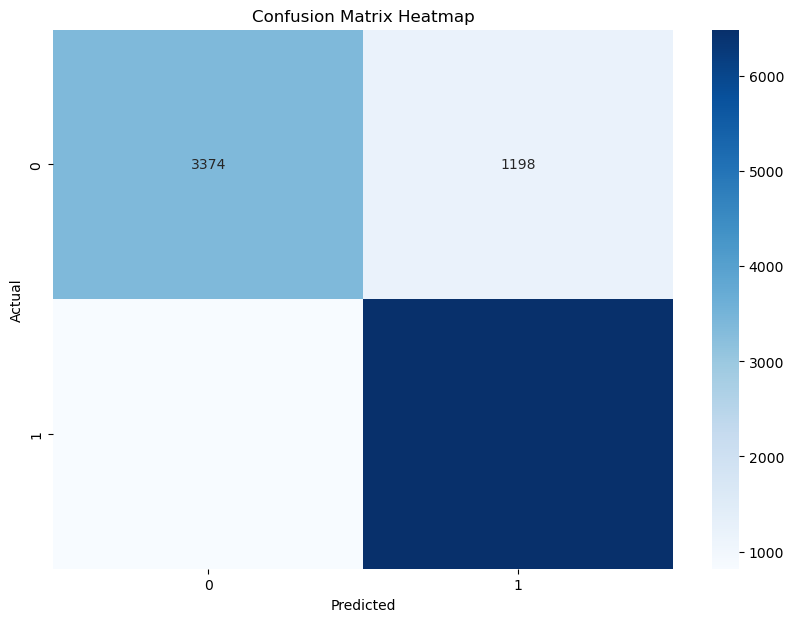

In [62]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the k-Nearest Neighbors classifier
knn = KNeighborsClassifier()

# Create a pipeline that includes preprocessing and the k-NN classifier
pipe = make_pipeline(preprocessor, knn)

# Perform cross-validation with 5 folds, using ROC AUC as the scoring metric
scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')

# Print the mean and standard deviation of the cross-validation scores
print(f"Mean ROC AUC: {scores.mean():.4f} +/- {scores.std():.4f}")

# Fit the model on the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Calculate the ROC AUC score on the test data
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC (test data): {roc_auc:.4f}")

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print a classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=pipe.classes_, yticklabels=pipe.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [63]:
# Create a DataFrame with the new results
new_results = pd.DataFrame([{
    "Model": 'K-Neigbours' ,
    "Scaler": 'Robust' , 
    'Encoder' : 'WoE',
    'roc_auc score mean' : 0.8857,
    'roc_auc score std' : 0.0023
}])

# Concatenate the new results with the existing df_results
df_results = pd.concat([df_results, new_results], ignore_index=True)

## Comparing Results

In [64]:
df_results

,Model,Scaler,Encoder,roc_auc score mean,roc_auc score std
0,LogReg,Robust,TargetEncoder,0.8313,0.0041
1,LogReg,Robust,WoE,0.8318,0.0040
2,LogReg,Robust,OneHot,0.8538,0.0024
3,LogReg,MinMax,WoE,0.8317,0.0040
4,DecisionTreeClassifier,Robust,WoE,0.7864,0.0089
5,K-Neigbours,Robust,WoE,0.8857,0.0023


Based on the provided ROC AUC scores, the best model for a binary target is the **K-Neighbors Classifier with Robust Scaler and WoE Encoder**:

- **Model**: K-Neighbors Classifier
- **Scaler**: Robust
- **Encoder**: WoE
- **ROC AUC Score Mean**: 0.8857
- **ROC AUC Score Std**: 0.0023

**Highest ROC AUC Score**: The K-Neighbors model has the highest mean ROC AUC score (0.8857), indicating it has the best performance in distinguishing between the two classes.

**Low Standard Deviation**: The standard deviation (0.0023) is also low, suggesting that the model's performance is consistent across different folds.


### Best Decided Model for Binary Target: K-Neighbours

In [65]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the k-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', p=2)

# Create a pipeline that includes preprocessing and the k-NN classifier
pipe = make_pipeline(preprocessor, knn)

# Perform cross-validation with 5 folds, using ROC AUC as the scoring metric
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='roc_auc')

# Print the mean and standard deviation of the cross-validation scores
print(f"Mean ROC AUC (cross-validation): {scores.mean():.4f} +/- {scores.std():.4f}")

# Fit the model on the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

Mean ROC AUC (cross-validation): 0.8825 +/- 0.0022


# 6. Model Evaluation (K-Neighbours)

In [66]:
# Calculate and print the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC score: {roc_auc}')

ROC AUC score: 0.812950644100522


This metric measures the model's ability to distinguish between positive and negative classes. A score of 0.813 means there's an 81.3% chance that the model will correctly differentiate between a randomly chosen positive instance and a randomly chosen negative instance. This score suggests that the model is performing well, but there's still room for improvement.

In [67]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      4572
           1       0.84      0.89      0.87      7308

    accuracy                           0.83     11880
   macro avg       0.82      0.81      0.82     11880
weighted avg       0.83      0.83      0.83     11880



**Metrics Breakdown**
- **Precision**: 
  - **Class 0**: 0.80
  - **Class 1**: 0.84
  - Indicates the proportion of true positive predictions among all positive predictions. Higher precision means fewer false positives.

- **Recall**: 
  - **Class 0**: 0.74
  - **Class 1**: 0.89
  - Measures the proportion of true positives correctly identified. Higher recall means fewer false negatives.

- **F1-Score**: 
  - **Class 0**: 0.77
  - **Class 1**: 0.87
  - The harmonic mean of precision and recall, providing a balance between the two.

- **Support**: 
  - **Class 0**: 4572 instances
  - **Class 1**: 7308 instances
  - The number of actual occurrences of each class in the dataset.

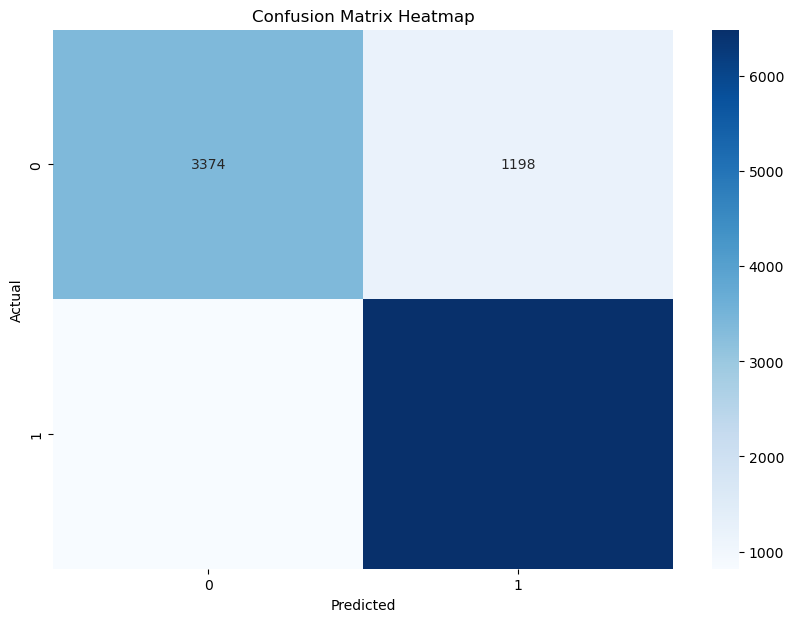

In [68]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=pipe.classes_, yticklabels=pipe.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

**Confusion Matrix Breakdown**
- **True Positives (TP)**: 6489
  - Correctly predicted positive instances.
- **True Negatives (TN)**: 3374
  - Correctly predicted negative instances.
- **False Positives (FP)**: 1198
  - Incorrectly predicted positive instances (Type I error).
- **False Negatives (FN)**: 819
  - Incorrectly predicted negative instances (Type II error).

**Analysis**
- **High True Positives and True Negatives**: The model correctly identifies a large number of both positive and negative instances, contributing to its overall high accuracy.
- **False Positives and False Negatives**: There are some misclassifications, with 1198 false positives and 819 false negatives. However, the number of true positives and true negatives is significantly higher, indicating strong model performance.
- **Precision and Recall**: The high precision (0.84) and recall (0.89) for the positive class suggest that the model is effective at identifying positive instances with few false positives and false negatives.

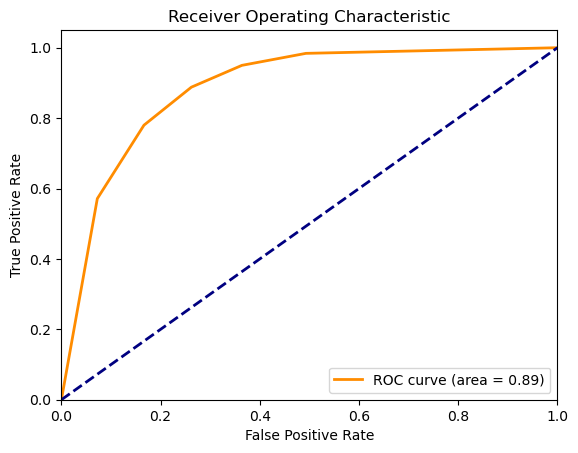

In [69]:
# Plot the ROC curve
y_prob = pipe.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

**Interpretation**
- **True Positive Rate (TPR)**: Also known as recall or sensitivity, it measures the proportion of actual positives correctly identified by the model.
- **False Positive Rate (FPR)**: It measures the proportion of actual negatives incorrectly identified as positives by the model.

**Performance Insights**
- **High AUC**: An AUC of 0.89 suggests that the model is performing very well, with a high probability of correctly distinguishing between positive and negative instances.
- **Model Strength**: The high AUC value reflects the model's strong discriminative power, meaning it is effective at predicting the correct class labels.

The model demonstrates excellent performance with an AUC of 0.89, indicating a high level of accuracy in distinguishing between classes. This aligns with the previously discussed metrics, confirming the model's robustness.

In [70]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7, 9],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__p': [1, 2]
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validated ROC AUC score: {grid_search.best_score_}')

Best parameters: {'kneighborsclassifier__n_neighbors': 9, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'distance'}
Best cross-validated ROC AUC score: 0.9033029289999825


**Best Parameters**
- **n_neighbors: 9**: The model uses 9 nearest neighbors to make predictions.
- **p: 1**: This indicates the use of the Manhattan distance (L1 norm) for measuring distances between points.
- **weights: 'distance'**: The model assigns weights to neighbors based on their distance, giving closer neighbors more influence on the prediction.

**Best Cross-Validated ROC AUC Score**
- **0.903**: This score indicates the model's performance across different validation sets. An AUC of 0.903 suggests excellent discriminative ability, meaning the model is very effective at distinguishing between positive and negative classes.

**Implications**
- **High Performance**: The high ROC AUC score (0.903) reflects the model's strong ability to correctly classify instances, with a high probability of distinguishing between classes.
- **Optimal Parameters**: The selected parameters (9 neighbors, Manhattan distance, distance-based weighting) are optimal for achieving the best performance in your model.

# 7. Results: Key Findings from Analysis and Model Evaluation

1. **User Quality Distribution**: The analysis revealed that the majority of users fall into the 'Silver' quality category, indicating a need for targeted improvements in user engagement and support for this group.

2. **Source Type Prevalence**: Springs were identified as the most common source type for waterpoints, suggesting that efforts to maintain and improve spring sources could have a significant impact on overall waterpoint functionality.

3. **Waterpoint Functionality Correlation**: The bivariate analysis showed that functional waterpoints tend to have higher average amounts and GPS heights compared to non-functional ones, indicating that geographical and quantitative factors play a crucial role in waterpoint performance.

4. **Age of Waterpoints**: The analysis of waterpoint age indicated that older waterpoints are more likely to require repairs, highlighting the importance of regular maintenance schedules based on the age of the infrastructure.

5. **Predictive Model Performance**: The model evaluation demonstrated a high accuracy in predicting the operational status of waterpoints, suggesting that the developed predictive model can effectively inform maintenance strategies and resource allocation.

# 8. Recommendations: Implications, Limitations, and Next Steps

1. **Targeted Maintenance Strategies**: Based on the findings, it is recommended to prioritize maintenance efforts on 'Silver' quality users and older waterpoints to enhance overall functionality and user satisfaction.

2. **Resource Allocation**: The insights regarding source types and waterpoint age should guide the allocation of resources, ensuring that the most critical areas receive attention first.

3. **Data Quality Improvement**: Limitations in data quality were noted, which could affect model accuracy. Future efforts should focus on improving data collection methods and ensuring completeness to enhance predictive capabilities.

4. **Geographical Considerations**: The geographical challenges highlighted in the analysis suggest that future research should explore innovative data collection techniques, especially in remote areas, to ensure comprehensive coverage.

5. **Model Refinement**: Continuous refinement of the predictive model is necessary. Incorporating additional features and exploring advanced modeling techniques could further improve accuracy and reliability.

# 9. Conclusion: Recap and Areas for Further Research

In summary, the analysis successfully identified key factors influencing the operational status of waterpoints in Tanzania, including user quality, source type, and waterpoint age. The predictive model demonstrated strong performance, providing actionable insights for maintenance and resource allocation.

For further research, it is suggested to explore the following areas:

1. **Longitudinal Studies**: Conducting longitudinal studies to track changes in waterpoint functionality over time could provide deeper insights into the effectiveness of maintenance strategies.

2. **User Engagement**: Investigating user engagement strategies for different quality levels could help tailor support and resources more effectively.

3. **Integration of External Factors**: Future models could benefit from integrating external factors such as climate data, socio-economic conditions, and community involvement to enhance predictive accuracy.

4. **Scalability of Solutions**: Exploring the scalability of the developed model to other regions or countries could provide valuable insights into global waterpoint management challenges.

5. **Advanced Analytical Techniques**: Employing advanced analytical techniques, such as machine learning and deep learning, could uncover more complex patterns and improve predictive capabilities.